# **Credit Card Fraud Detection System**
## **Capstone Project IIIT-Banglore** 
## By Ashwini Abhang 
This notebook contains my approach towards credit card fraud detection using Machine Learning Algorithms. Credit card fraud detection is a very serious modern day problem. In this notebook my aim will be to get the maximum possible accuracy for the European Transaction data set which was released in 2013. The metrics I will be using is F1- Score, Precision and Recall.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing all the necessary dependecies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
import time
warnings.filterwarnings("ignore")

from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn import metrics
from sklearn.metrics import auc, f1_score, RocCurveDisplay, precision_score, recall_score

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

Now let us import the data we have:

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Ashwini_Credit_Card_Capstone/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **Section 1 - Data Preparation**



#### **Section 1.1 - Checking Null Values**
**Now let us check if there are any null values present in our data set:**

If null values are found we will replace these values with the mean or median of that data attribute.

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Observation - As we can see there are no null values in our data set so we can move forward and understand our dataset.

#### **Section 1.2 - Calculating some statistical data**
The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values. 

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### **Section 1.3 - EDA (Exploratory Data Analysis)**
In this step we will plot different graphs and try to find out different patterns in our data which will help us for feature selection.

#### Distribution of Target Variable:
The graph below shows the distribution of our target varible which has two values 0 and 1 indicating not a fraud and a fraud respectively.

[]

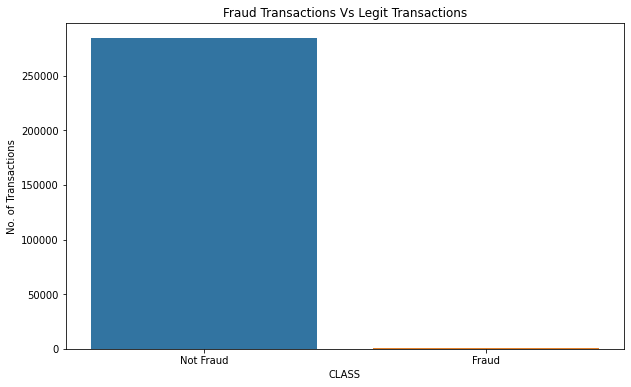

In [5]:
data = list(df["Class"].values)
ones = data.count(1)
zeros = data.count(0)
fig = plt.figure(figsize=(10,6))
sns.barplot(x=["Not Fraud", "Fraud"], y = [zeros, ones])
plt.title("Fraud Transactions Vs Legit Transactions")
plt.xlabel("CLASS")
plt.ylabel("No. of Transactions")
plt.plot()

It is clearly visible that there is a great imbalance in the data where we have extremely low fraud transactions and too many legit ones so to tackle this issue we will have to use techniques like oversampling the data while traning our model.



#### **Section 1.4 - Droping Time and Amount columns and standardizing amount column** 
Normalising the amount column. The amount column is not in line with the anonimised features.

In [6]:
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount'],
      dtype='object')

In [8]:
columns_swapped = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','normAmount','Class']
df = df.reindex(columns = columns_swapped)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


#### **Section 1.5 - Checking Data Distribution** 
**Now let us check for the data distribution for the other attributes as well:**

We want the distribution to be Gaussian if not then we will apply data transformation tecniques to convert it into a Gaussian curve.

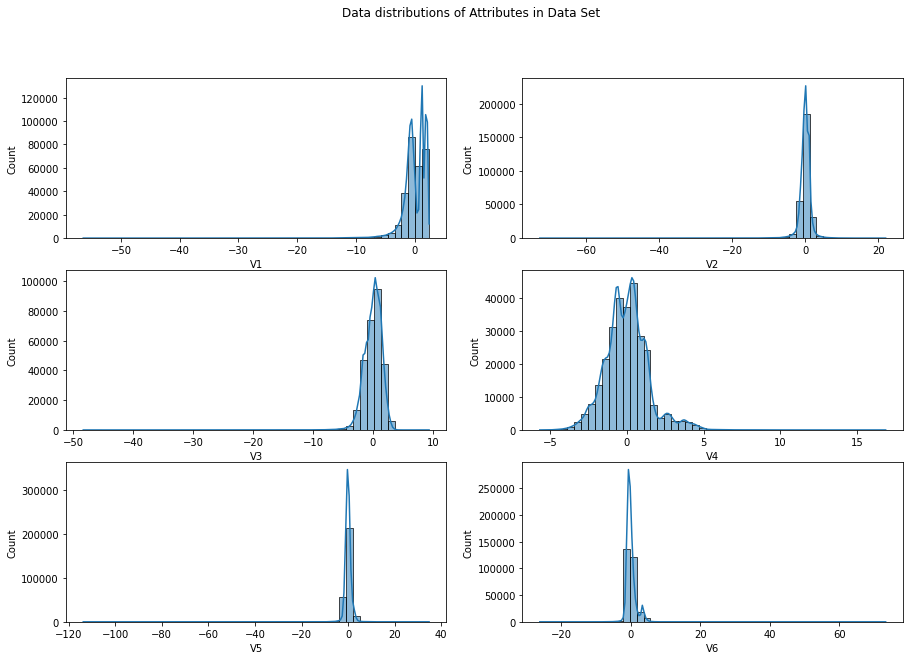

In [9]:
columns = list(df.columns)

def data_distribution(columns, bins = 50):
    fig = plt.figure(figsize=(15, 10))
    plt.suptitle("Data distributions of Attributes in Data Set")
    counter = 1
    for i in columns:
        plt.subplot(3,2, counter)
        sns.histplot(df[i], bins = bins, kde = True)
        counter += 1
        
data_distribution(columns[:6])

#### Observations
**In the graphs above it is visible that the distribution of V1,V4, and V6 is not gaussian so we will have to do transformation of these columns**
1. V1 = Left Skewed
2. V4 = Right Skewed
3. V6 = Right Skewed

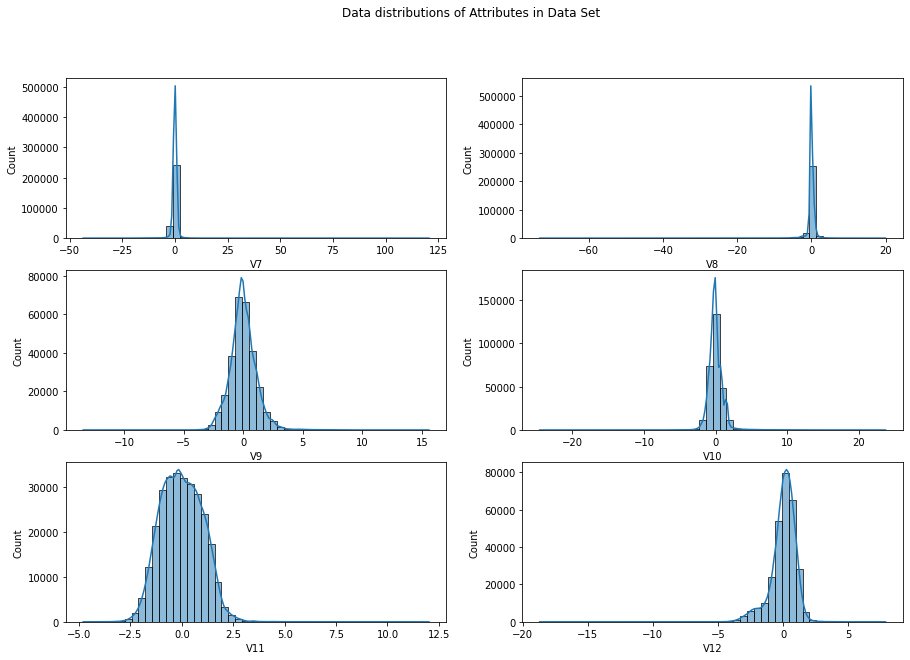

In [10]:
data_distribution(columns[6:12])

#### **Observations**
**Most of the graphs above show normal Gaussian Distribution which means no transformation is required for those but V12 need transformation**
1. V12 = Left Skewed

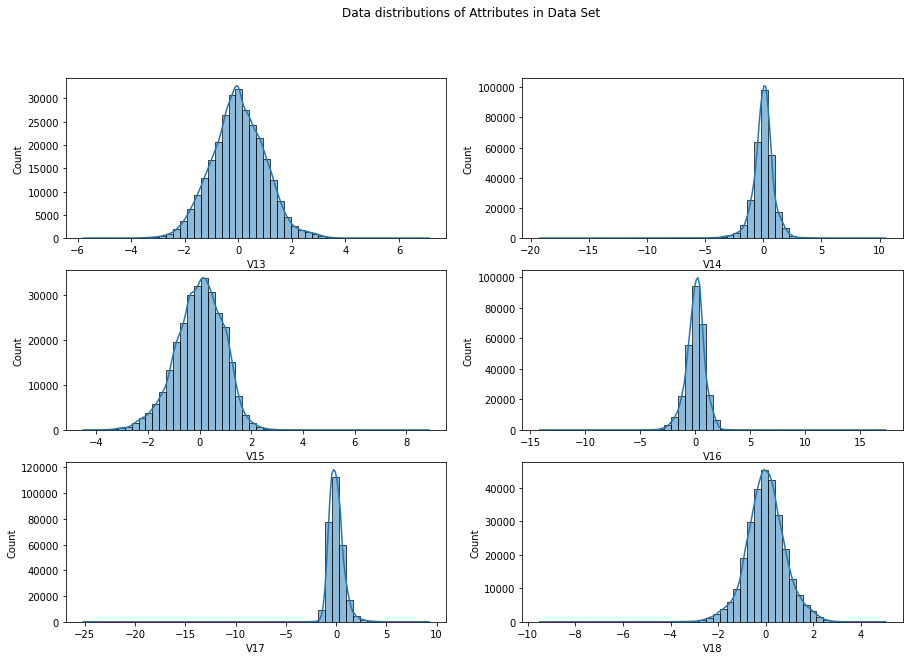

In [11]:
data_distribution(columns[12:18])

#### Observations
**Most of the graphs above show normal Gaussian Distribution which means transformation is not required**

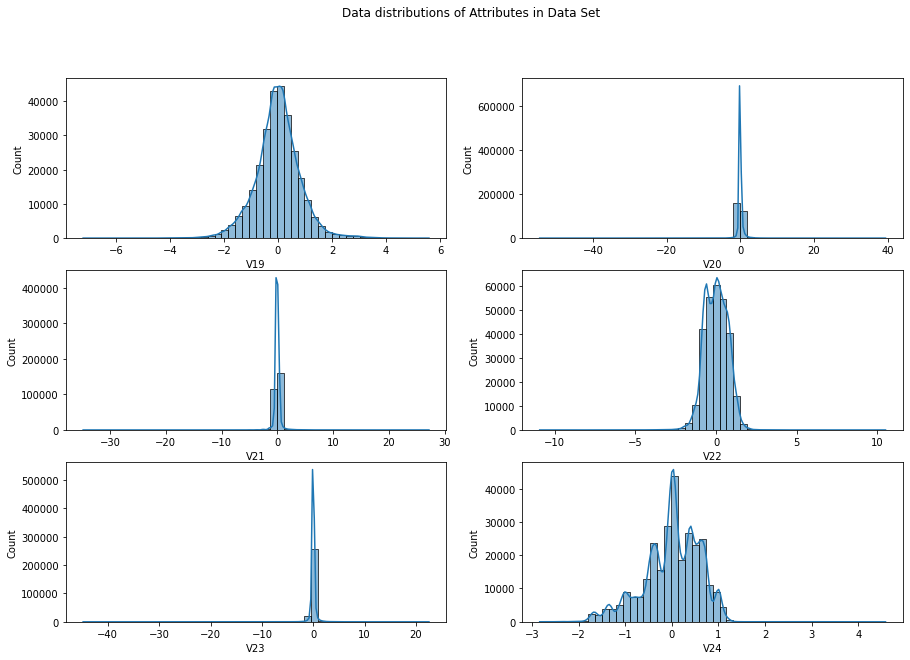

In [12]:

data_distribution(columns[18:24])

**Most of the graphs above show normal Gaussian Distribution except V22 and V24 which means no transformation is required for most of the columns**
1. V22 = Not Smooth Gaussian 
2. V24 = Not Smooth Gaussian

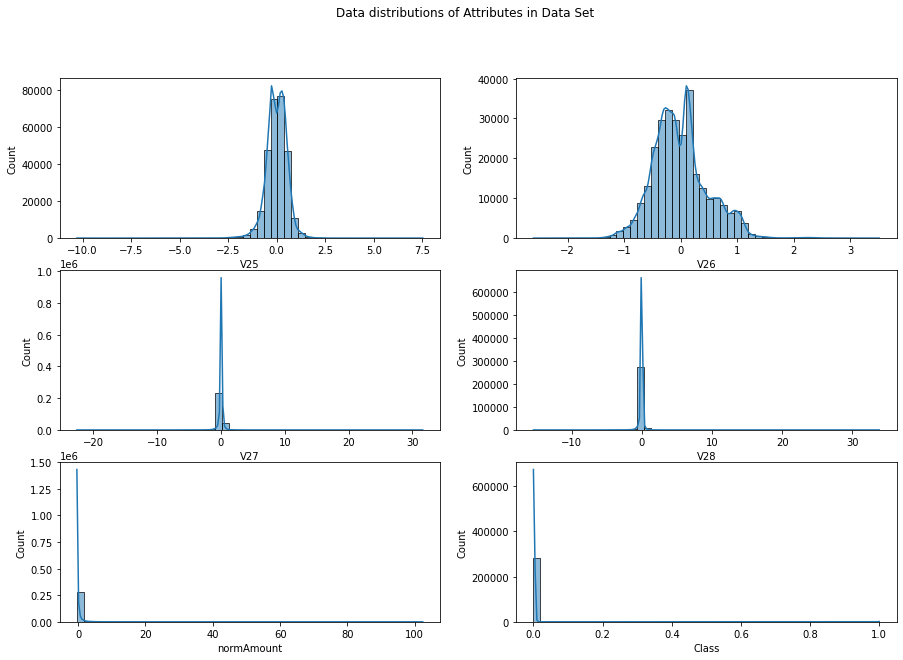

In [13]:
data_distribution(columns[24:30])

#### **Section 1.6 - Observations of Data Distribution** 

**In the graph above it is seen that the normAmount variable has right skewness in the normAmount data and it is seen that V25 and V26 has a Gaussian Distribution but doesn't show a smooth curve so we will have to transform the data.**
1. V25 = Not Smooth Gaussian
2. V26 = Not Smooth Gaussian 
3. normAmount = Right Skewed <br>

#### Transforming the Data:

For transforming the data we will use the Power Transformer and Quantile Transformer from sklearn.We will compare the results of both the transformers and select the best. The variables to be transformed are:
1. V1
2. V4
3. V6
4. V12
5. V22
6. V24
7. V25
8. V26
9. normAmount


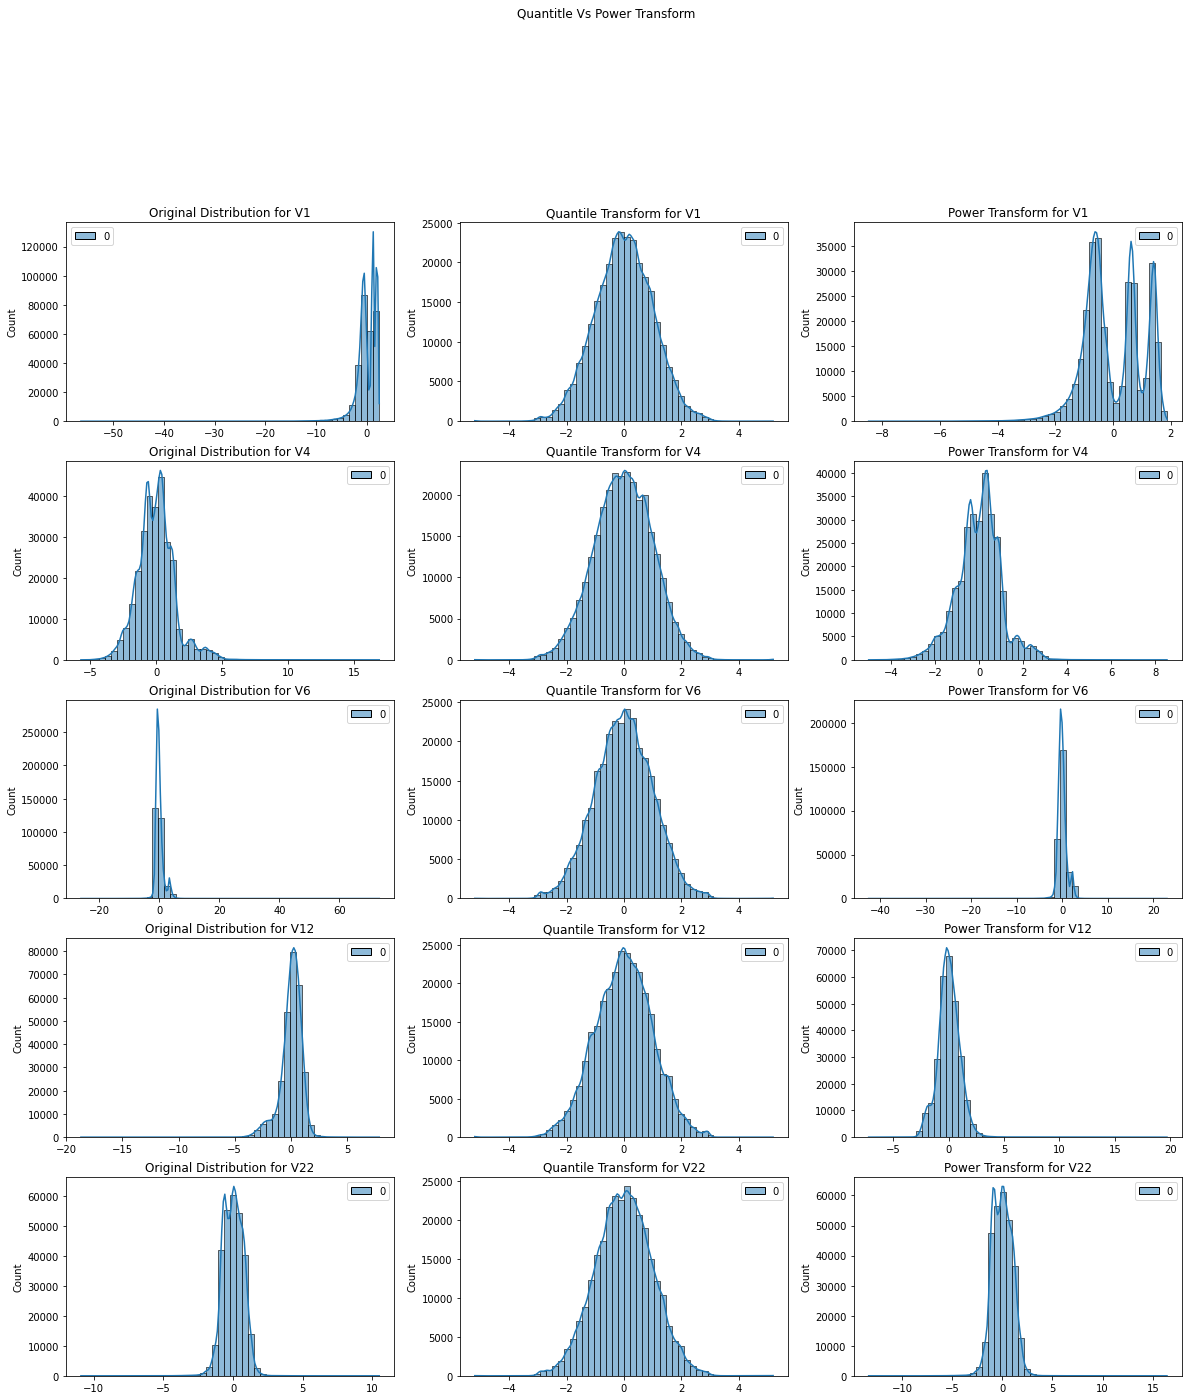

In [14]:
cols1 = ["V1","V4", "V6", "V12", "V22"]
cols2 = [ "V24","V25", "V26", "normAmount"]

def check_best_transformer(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    plt.suptitle("Quantitle Vs Power Transform")
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(7,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(7,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(7,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3

check_best_transformer(cols1)

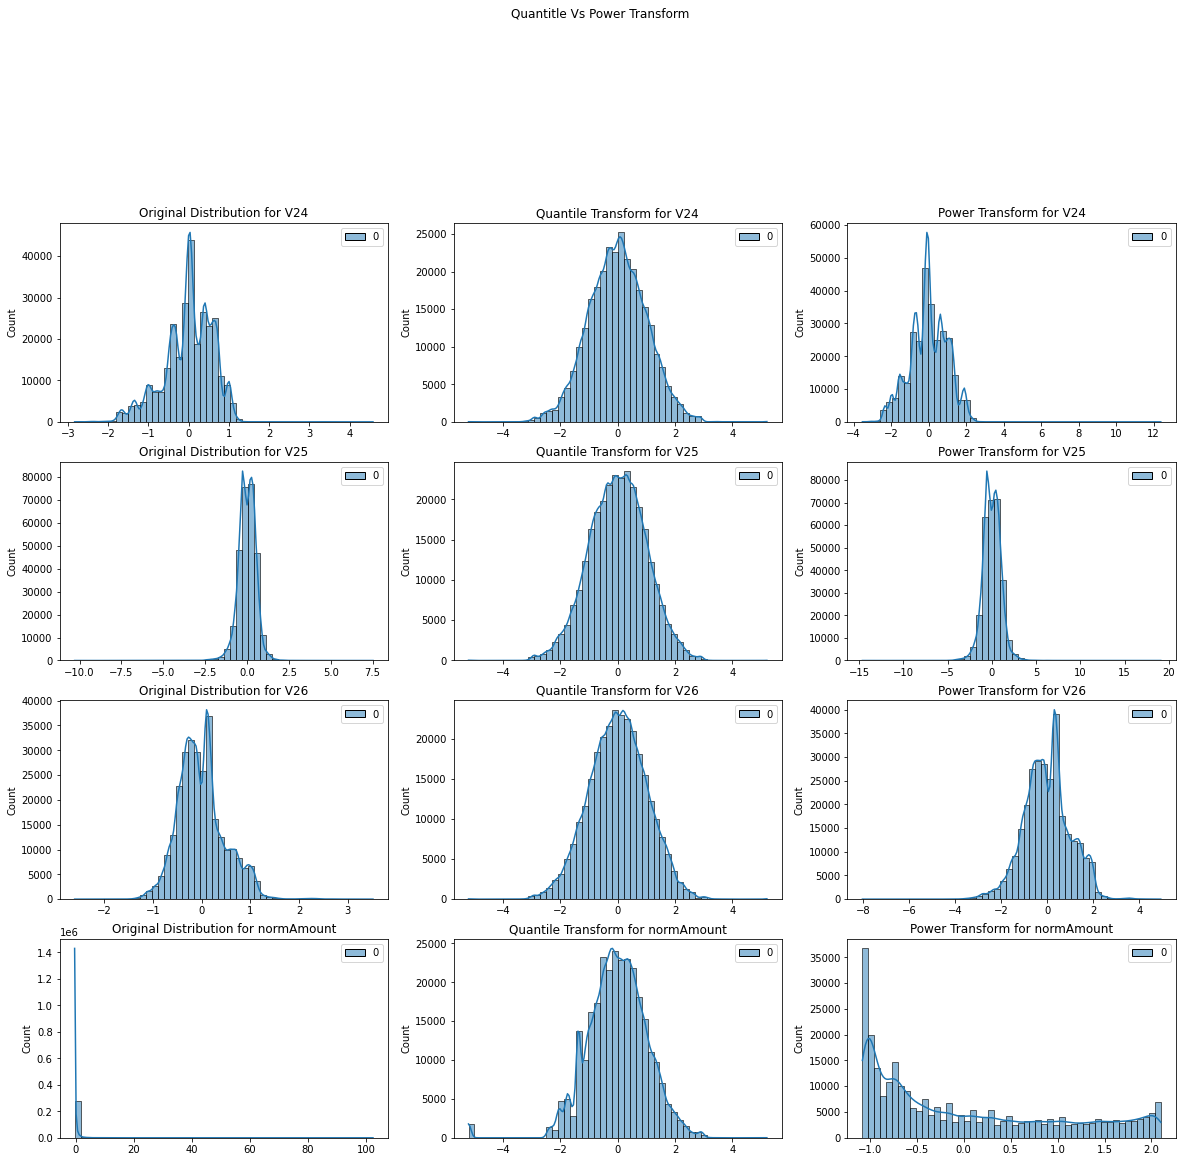

In [15]:
check_best_transformer(cols2)

#### **Observations after applying transformation**
**It is clearly seen from the graphs above that Quantile Transformer works a better job at transforming the data into Gaussian Distribution. So we will apply the Quantile Tranformer on our data.**

In [16]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
cols = cols1 + cols2
for i in cols:
    df[i] = qt.fit_transform(np.array(df[i]).reshape(-1,1))
    print(f"{i} transformation Successful!")


V1 transformation Successful!
V4 transformation Successful!
V6 transformation Successful!
V12 transformation Successful!
V22 transformation Successful!
V24 transformation Successful!
V25 transformation Successful!
V26 transformation Successful!
normAmount transformation Successful!


#### **Section 1.7 - Correlation Graph**

Now we will check the correlation between independent variables and the target variables. To do this we will use the Pearson Correlation. the Pearson Correalation Coefficient ranges from (-1 to 1) where -1 means that the data is negatively correlated, 1 means that the data is positively correlated and 0 means that there is no correlation between the variables.

[]

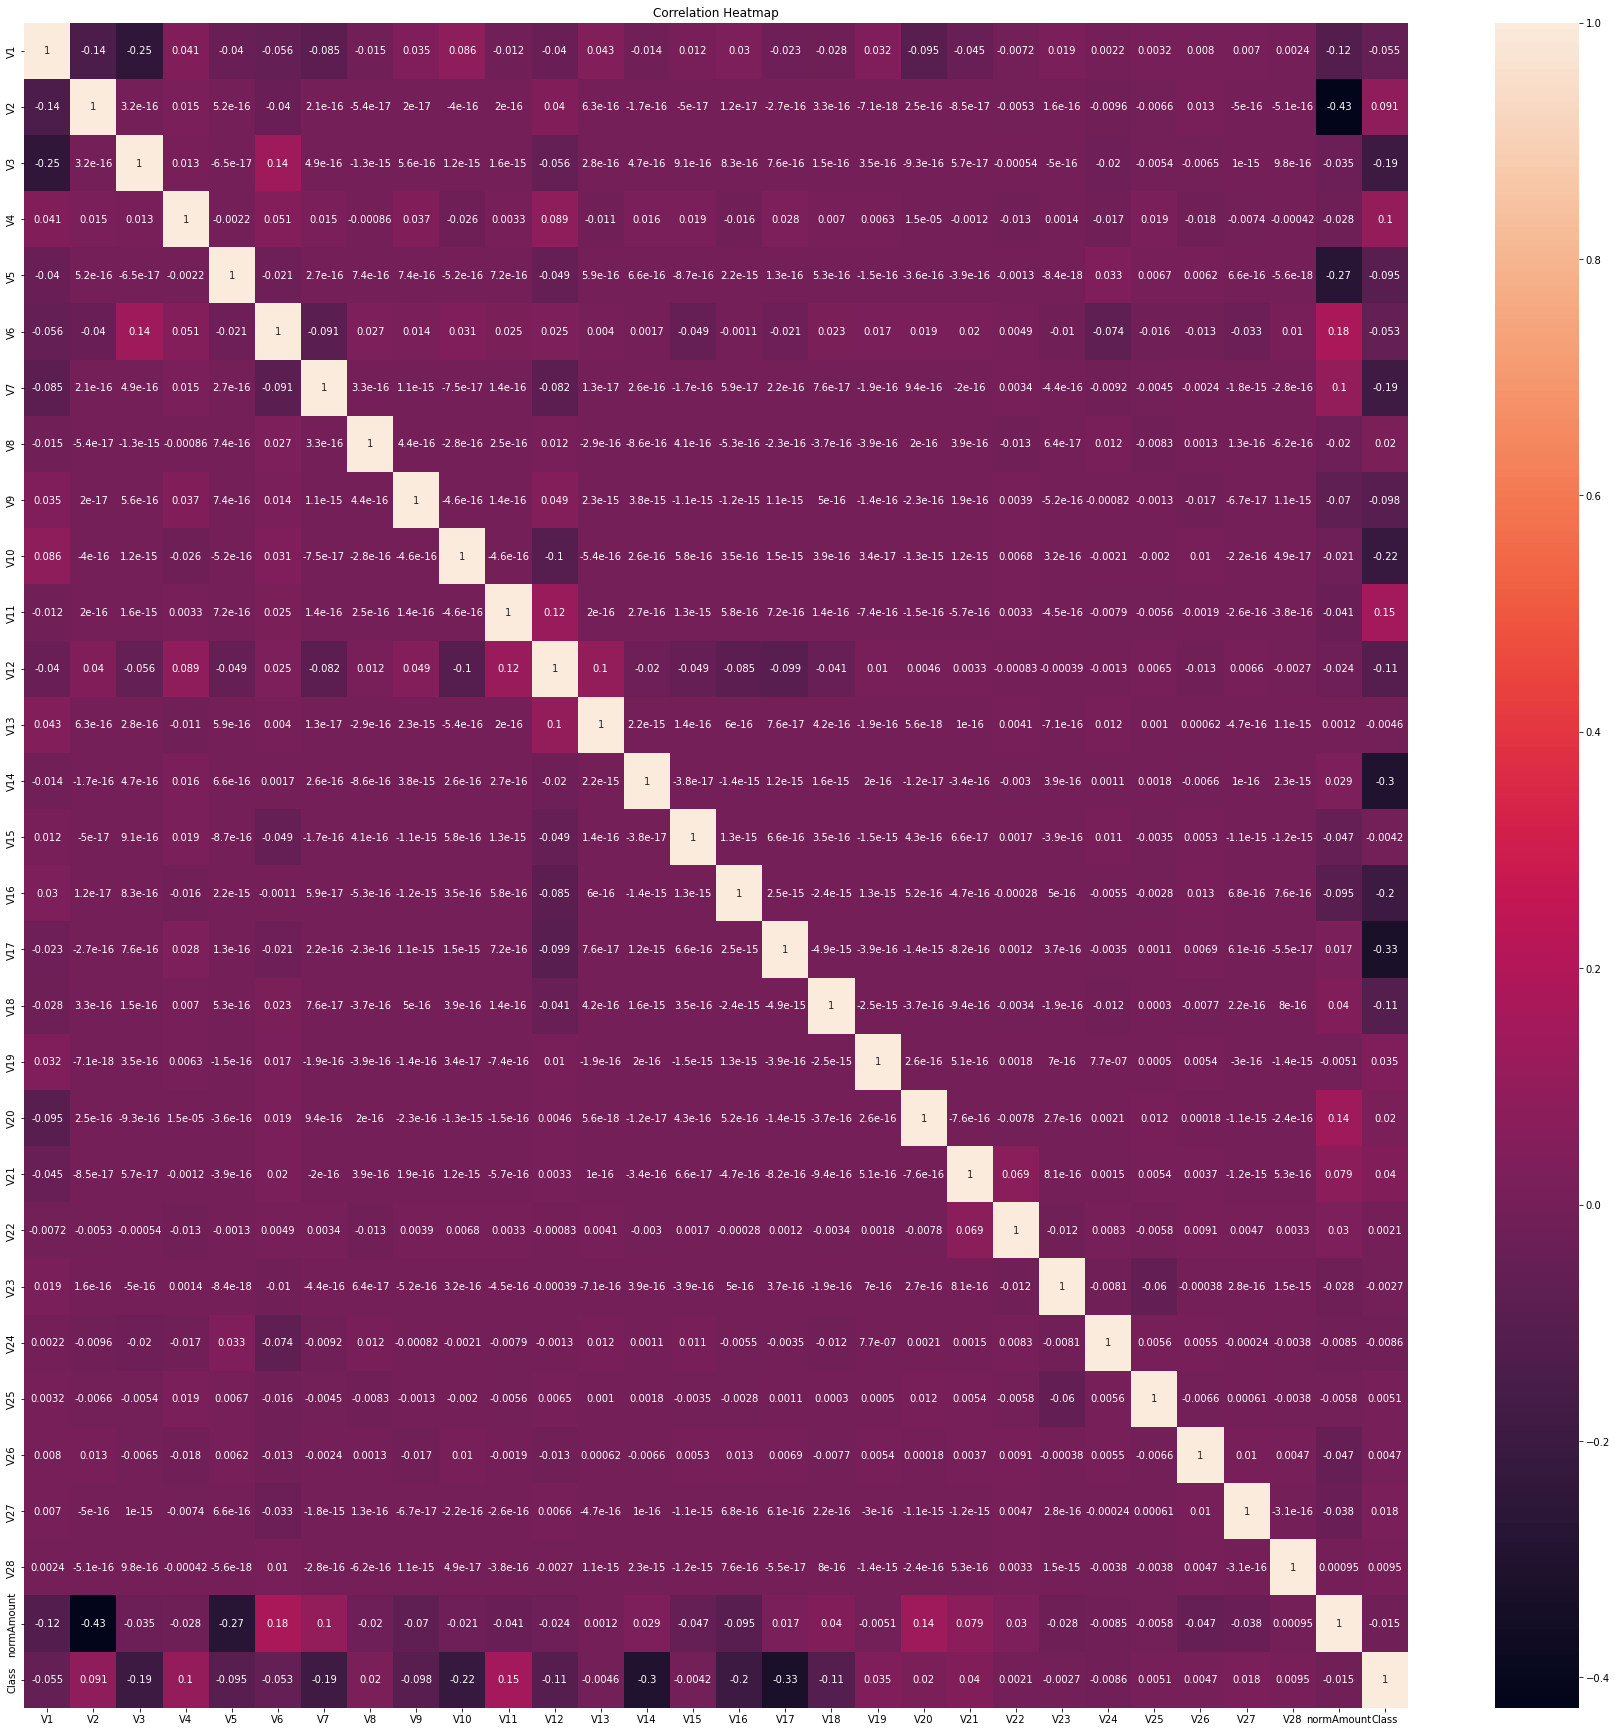

In [17]:
figure = plt.figure(figsize=(31, 31))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Heatmap")
plt.plot()

**From the heatmap above we can see that there is no significant relation between any of the the independent variables so we dont have to drop any columns from our dataset.**

In [18]:
df.shape

(284807, 30)

## **Section 2 - Model Building**
### **Section 2.1 - Model Building and Evaluation on Imbalanced Data**
Please not that the stratified train test split is done in the  next cell. A function is created for monitoring and evaluarting the performance of the models on raw data.  

<br>

#### 2.1 Stratified K-Fold Cross Validation on Imbalanced Data:

Now to observe the performance of our models we will use the StrafiedKFold from sklearn.model_selection for this task we will split our data set into 10 folds for trainng and testing data.

The models that we will test are:

1. Random Forest
2. Logistic Regression
3. Naive Bayes
4. Stochastic Gradient Descent Classifier
5. XGBoost Classifier

Creating a function for evaluation of the different models trained on the data  

In [24]:
X = df.iloc[:, :29].values
Y = df.iloc[:, 29].values

def classification_evaluation(classifier, X, Y, classifier_name, columns):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    accuracy_arr = np.zeros(shape=(1,10))
    f1_score_arr = np.zeros(shape=(1,10))
    precision_arr = np.zeros(shape=(1,10))
    recall_arr = np.zeros(shape=(1,10))
    feature_importance_arr = np.zeros(shape=(1,29))
    time_arr = []
    

    cv = StratifiedKFold(n_splits=10)
    fig, ax = plt.subplots(figsize=(15, 10))
    start_time = time.time()
    for i, (train, test) in enumerate(cv.split(X, Y)):
        itr_start_time = time.time()
        classifier.fit(X[train], Y[train])
        itr_end_time = time.time()
        viz = RocCurveDisplay.from_estimator(classifier, X[test], Y[test],
                             name=f'ROC fold {i}',ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        try:
            feature_importance_arr += classifier.feature_importances_
        except:
            try:
                feature_importance_arr += np.array([abs(i) for i in classifier.coef_[0]])
            except:
                feature_importance_arr += np.array([abs(i) for i in permutation_importance(classifier, X[test], Y[test]).importances_mean])
            
        
        predict = classifier.predict(X[test])
        accuracy = classifier.score(X[test], Y[test])
        accuracy_arr[0, i] = accuracy
        f1 = f1_score(predict, Y[test])
        f1_score_arr[0, i] = f1
        precision = precision_score(predict, Y[test])
        precision_arr[0, i] = precision
        recall = recall_score(predict, Y[test])
        recall_arr[0, i] = recall
        train, test = train, test
        time_arr.append(itr_end_time-itr_start_time)
        print(f"Fold-{i}:  accuracy: {accuracy}  f1-score: {f1}  precision: {precision}  recall: {recall}  time: {itr_end_time-itr_start_time}")
    end_time = time.time()
    
    print()
    print(f"Classification Report for {classifier_name}")
    print("Average Accuracy :", np.mean(accuracy_arr))
    print("Average F1-Score :", np.mean(f1_score_arr))
    print("Average Precision :", np.mean(precision_arr))
    print("Average Recall :", np.mean(recall_arr))
    print("Total Time :", end_time - start_time)
    
    fig = plt.figure(figsize=(15, 10))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title=f"Receiver Operating Characteristic for {classifier_name}")
    ax.legend(loc="lower right")
    plt.show()
    
    feature_importance_arr /= 10
    
    fig = plt.figure(figsize=(15, 10))
    
    plt.subplot(1, 2, 1)
    feature_imp = pd.Series(feature_importance_arr[0], index = columns[:29])
    feature_imp.nlargest(10).plot(kind = 'bar')
    plt.title(f"Feature Importance of {classifier_name}")
    
    
    plt.subplot(1,2,2)
    plt.plot(time_arr, 'go-', color="darkblue")
    plt.plot([max(time_arr) for i in range(10)], color='lightcoral', label='UL')
    plt.plot([min(time_arr) for i in range(10)], color='lightgreen', label='LL')
    plt.title("Training time for every iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Time in sec.")
    plt.legend(loc="upper right")
    
    plt.show()
    
    return np.mean(accuracy_arr), np.mean(f1_score_arr), np.mean(precision_arr), np.mean(recall_arr), mean_auc

2.1.1 Logistic Regression Model

Fold-0:  accuracy: 0.9986657771847899  f1-score: 0.6935483870967741  precision: 0.8775510204081632  recall: 0.5733333333333334  time: 3.106736421585083
Fold-1:  accuracy: 0.9988413328183702  f1-score: 0.4923076923076923  precision: 0.32653061224489793  recall: 1.0  time: 2.271012306213379
Fold-2:  accuracy: 0.9997542221129876  f1-score: 0.9247311827956989  precision: 0.8775510204081632  recall: 0.9772727272727273  time: 2.0932774543762207
Fold-3:  accuracy: 0.9989466661985184  f1-score: 0.5588235294117647  precision: 0.3877551020408163  recall: 1.0  time: 1.7200920581817627
Fold-4:  accuracy: 0.9989115550718023  f1-score: 0.5753424657534246  precision: 0.42857142857142855  recall: 0.875  time: 1.7023742198944092
Fold-5:  accuracy: 0.998735999438222  f1-score: 0.6170212765957446  precision: 0.58  recall: 0.6590909090909091  time: 1.9298083782196045
Fold-6:  accuracy: 0.9996488887328394  f1-score: 0.8979591836734694  precision: 0.88  recall: 0.9166666666666666  time: 2.201005697250366
Fo

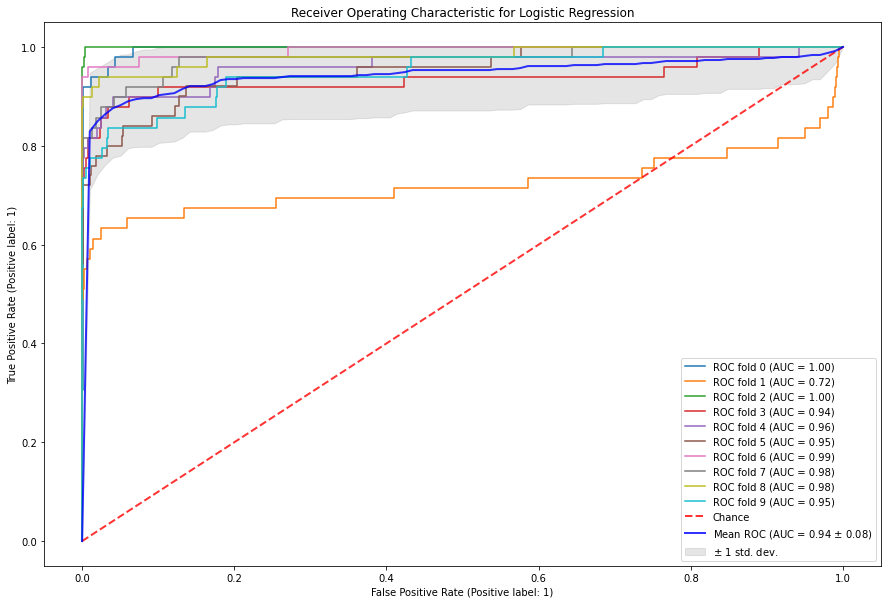

<Figure size 1080x720 with 0 Axes>

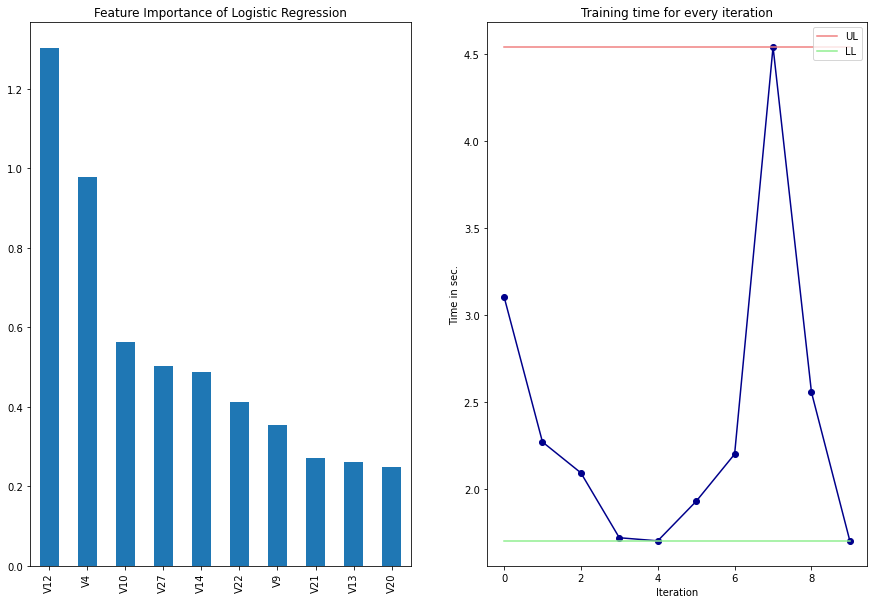

In [25]:
classifier = LogisticRegression(max_iter=1000)
lr_acc, lr_f1, lr_precision, lr_recall, lr_auc = classification_evaluation(classifier, X, Y, "Logistic Regression", list(df.columns))

2.1.2 SGD Classifier

Fold-0:  accuracy: 0.9985253326779256  f1-score: 0.6500000000000001  precision: 0.7959183673469388  recall: 0.5492957746478874  time: 3.0648157596588135
Fold-1:  accuracy: 0.9990871107053826  f1-score: 0.6486486486486486  precision: 0.4897959183673469  recall: 0.96  time: 4.456324815750122
Fold-2:  accuracy: 0.9997191109862715  f1-score: 0.9148936170212767  precision: 0.8775510204081632  recall: 0.9555555555555556  time: 4.855169773101807
Fold-3:  accuracy: 0.9987711105649381  f1-score: 0.4444444444444445  precision: 0.2857142857142857  recall: 1.0  time: 9.546334981918335
Fold-4:  accuracy: 0.9985604438046417  f1-score: 0.3278688524590165  precision: 0.20408163265306123  recall: 0.8333333333333334  time: 4.499447584152222
Fold-5:  accuracy: 0.9989817773252344  f1-score: 0.6027397260273973  precision: 0.44  recall: 0.9565217391304348  time: 3.0929744243621826
Fold-6:  accuracy: 0.9996839998595555  f1-score: 0.9052631578947369  precision: 0.86  recall: 0.9555555555555556  time: 4.584386

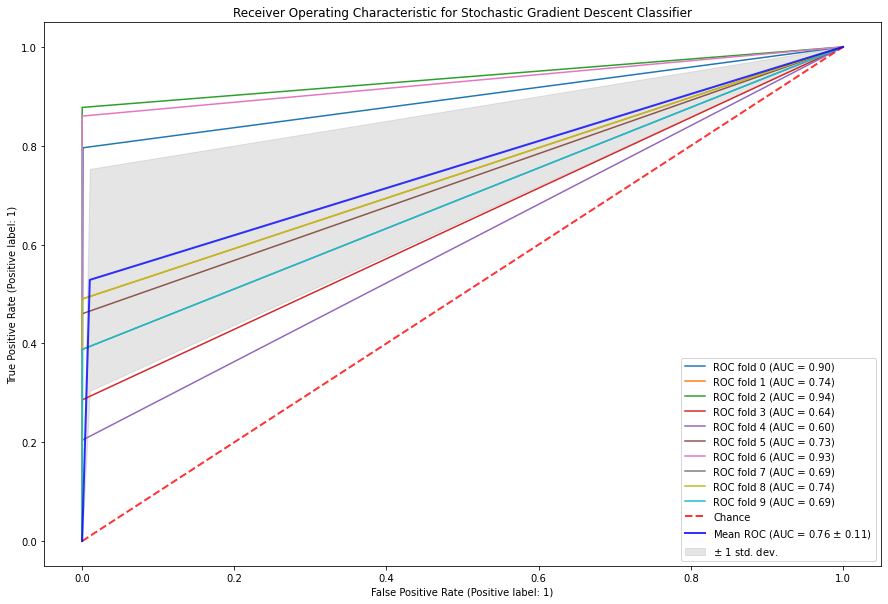

<Figure size 1080x720 with 0 Axes>

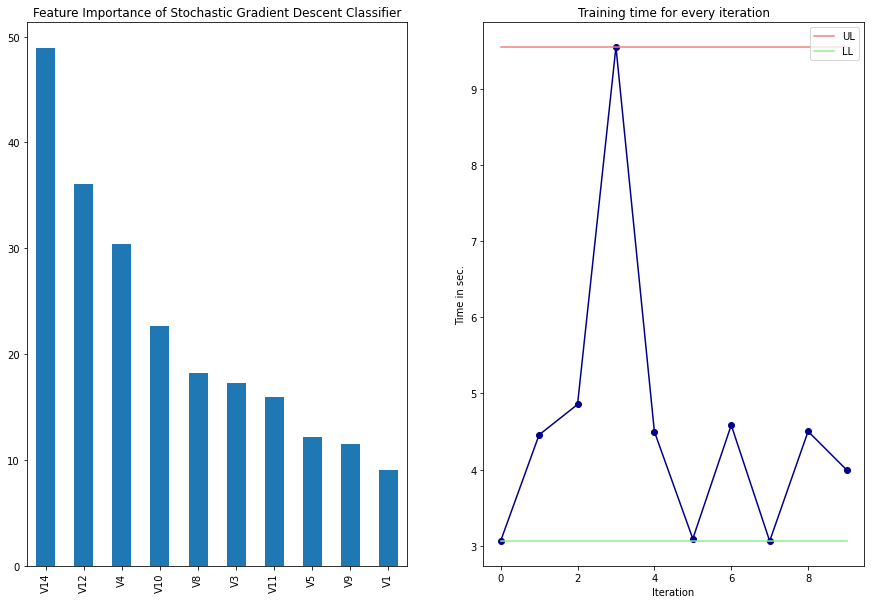

In [26]:
classifier = SGDClassifier(loss="modified_huber", penalty = "l2")
sgd_acc, sgd_f1, sgd_precision, sgd_recall, sgd_auc = classification_evaluation(classifier, X, Y, "Stochastic Gradient Descent Classifier", list(df.columns))

2.1.3 Gaussian Naive Bayes

Fold-0:  accuracy: 0.975035988904884  f1-score: 0.11235955056179776  precision: 0.9183673469387755  recall: 0.0598404255319149  time: 0.1681499481201172
Fold-1:  accuracy: 0.9804079912924406  f1-score: 0.13622291021671826  precision: 0.8979591836734694  recall: 0.07370184254606366  time: 0.16406464576721191
Fold-2:  accuracy: 0.9778799901688845  f1-score: 0.1298342541436464  precision: 0.9591836734693877  recall: 0.06962962962962962  time: 0.16301202774047852
Fold-3:  accuracy: 0.9816017696007865  f1-score: 0.11784511784511786  precision: 0.7142857142857143  recall: 0.06422018348623854  time: 0.16880416870117188
Fold-4:  accuracy: 0.9813559917137741  f1-score: 0.11940298507462685  precision: 0.7346938775510204  recall: 0.06498194945848375  time: 0.16356515884399414
Fold-5:  accuracy: 0.9783715459429093  f1-score: 0.11494252873563218  precision: 0.8  recall: 0.06191950464396285  time: 0.21355390548706055
Fold-6:  accuracy: 0.9774937677750078  f1-score: 0.13025780189959296  precision: 0.

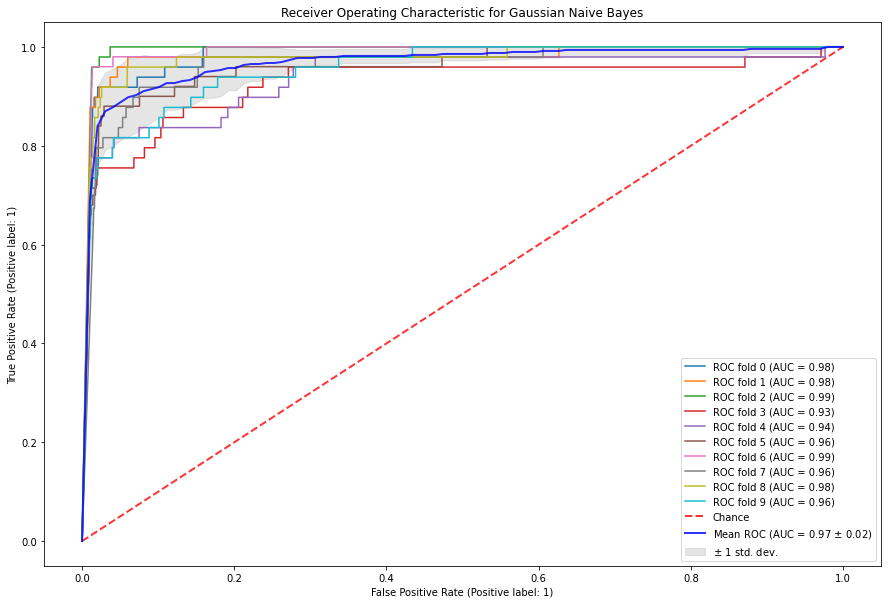

<Figure size 1080x720 with 0 Axes>

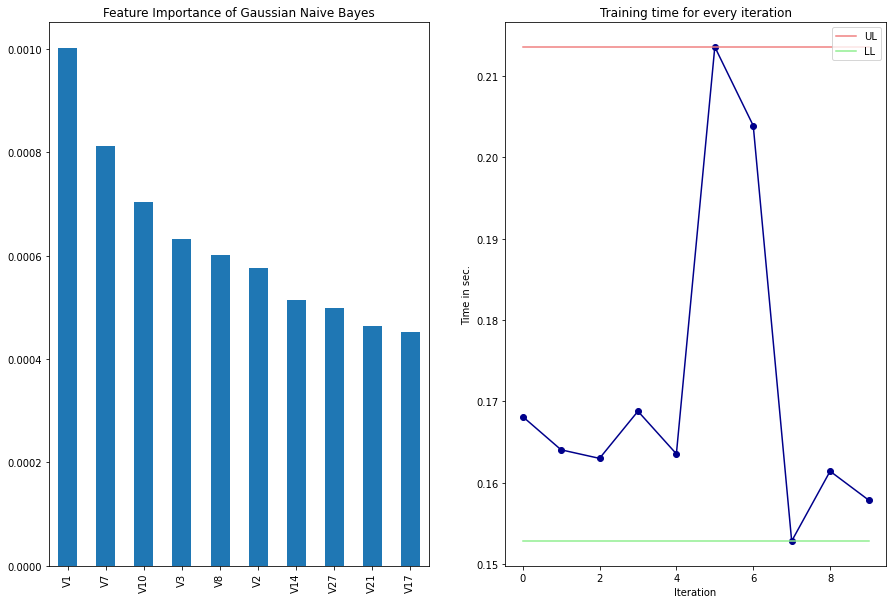

In [27]:
classifier = GaussianNB()
gn_acc, gn_f1, gn_precision, gn_recall, gn_auc = classification_evaluation(classifier, X, Y, "Gaussian Naive Bayes", list(df.columns))

2.1.4 Random Forest Classifier

Fold-0:  accuracy: 0.9985955549313578  f1-score: 0.6774193548387096  precision: 0.8571428571428571  recall: 0.56  time: 54.44271540641785
Fold-1:  accuracy: 0.9989115550718023  f1-score: 0.5753424657534246  precision: 0.42857142857142855  recall: 0.875  time: 48.857478618621826
Fold-2:  accuracy: 0.9998244443664197  f1-score: 0.9484536082474228  precision: 0.9387755102040817  recall: 0.9583333333333334  time: 47.0962769985199
Fold-3:  accuracy: 0.9994733330992591  f1-score: 0.819277108433735  precision: 0.6938775510204082  recall: 1.0  time: 50.2157416343689
Fold-4:  accuracy: 0.9994382219725431  f1-score: 0.813953488372093  precision: 0.7142857142857143  recall: 0.9459459459459459  time: 45.50639605522156
Fold-5:  accuracy: 0.9989466661985184  f1-score: 0.6875  precision: 0.66  recall: 0.717391304347826  time: 46.973686933517456
Fold-6:  accuracy: 0.9997893332397036  f1-score: 0.9375  precision: 0.9  recall: 0.9782608695652174  time: 49.29211235046387
Fold-7:  accuracy: 0.999508426966

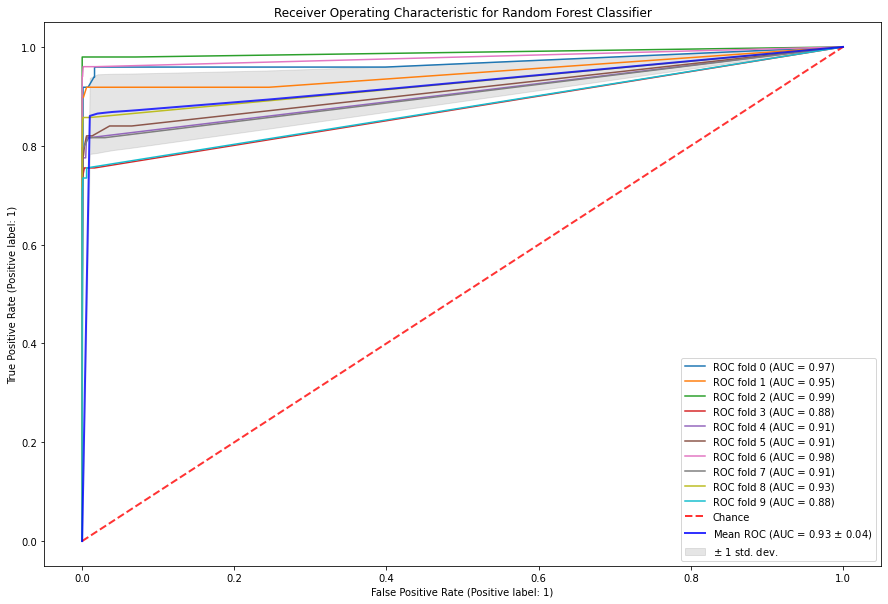

<Figure size 1080x720 with 0 Axes>

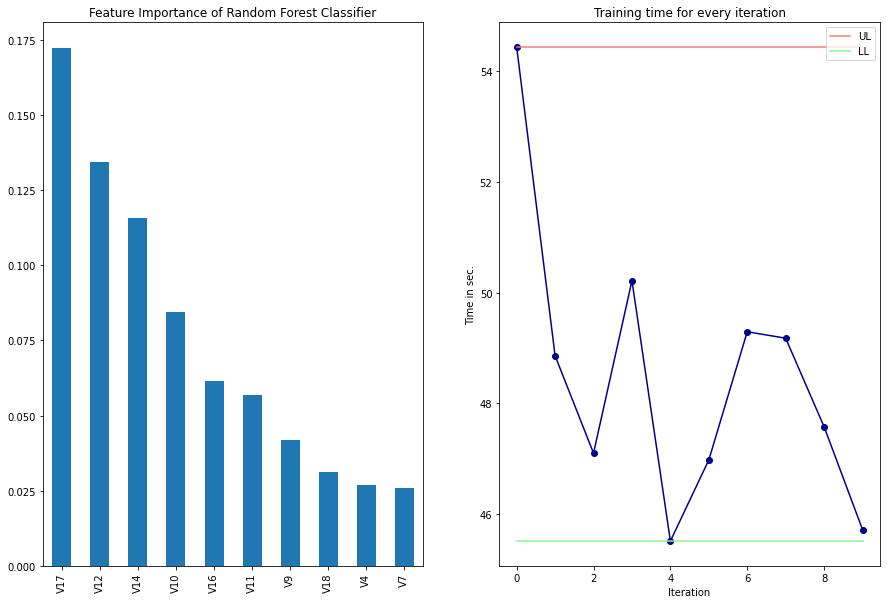

In [28]:
classifier = RandomForestClassifier(n_estimators=20, max_depth = 26)
rf_acc, rf_f1, rf_precision, rf_recall, rf_auc = classification_evaluation(classifier, X, Y, "Random Forest Classifier", list(df.columns))

2.1.5 XGBoost Classifier

Fold-0:  accuracy: 0.9984902215512096  f1-score: 0.6614173228346457  precision: 0.8571428571428571  recall: 0.5384615384615384  time: 134.27829766273499
Fold-1:  accuracy: 0.9990168884519505  f1-score: 0.6111111111111112  precision: 0.4489795918367347  recall: 0.9565217391304348  time: 125.3417329788208
Fold-2:  accuracy: 0.9998946666198518  f1-score: 0.9690721649484536  precision: 0.9591836734693877  recall: 0.9791666666666666  time: 135.28148794174194
Fold-3:  accuracy: 0.9994733330992591  f1-score: 0.819277108433735  precision: 0.6938775510204082  recall: 1.0  time: 141.86604499816895
Fold-4:  accuracy: 0.999403110845827  f1-score: 0.8089887640449438  precision: 0.7346938775510204  recall: 0.9  time: 141.87421894073486
Fold-5:  accuracy: 0.9988413328183702  f1-score: 0.6597938144329897  precision: 0.64  recall: 0.6808510638297872  time: 122.14359593391418
Fold-6:  accuracy: 0.9996839998595555  f1-score: 0.9072164948453608  precision: 0.88  recall: 0.9361702127659575  time: 123.72421

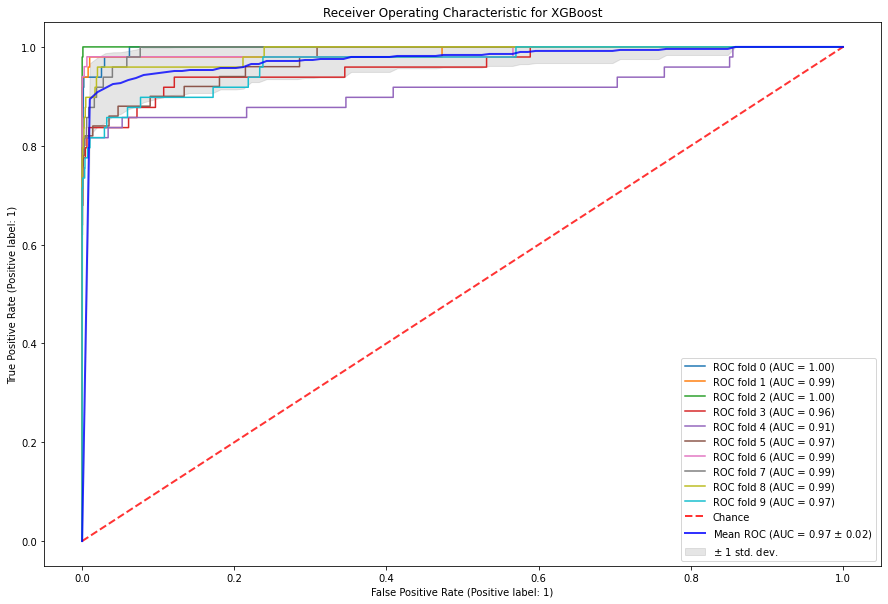

<Figure size 1080x720 with 0 Axes>

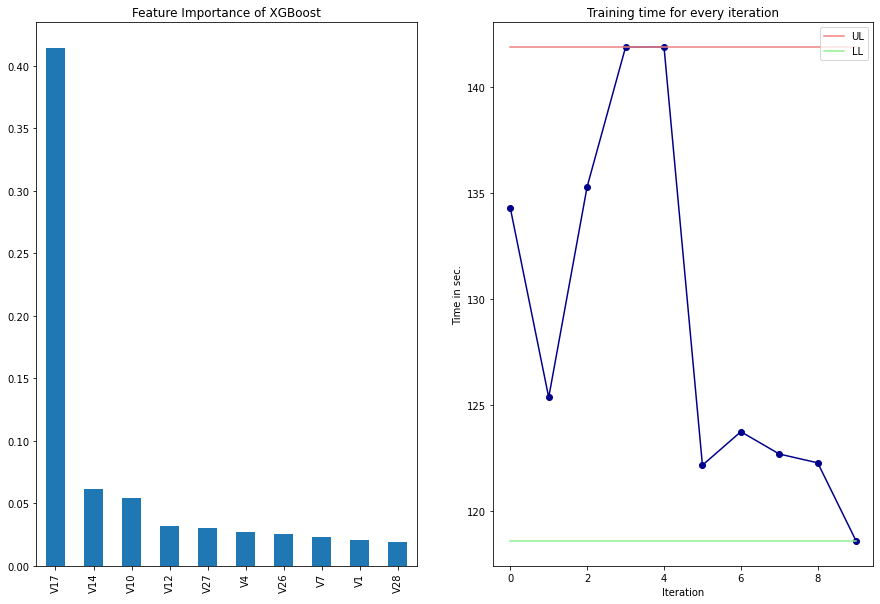

In [29]:
classifier = XGBClassifier(use_label_encoder=False, disable_default_eval_metric=1)
xg_acc, xg_f1, xg_precision, xg_recall, xg_auc = classification_evaluation(classifier, X, Y, "XGBoost", list(df.columns))

### **Section 2.1 - Observations of Model Buildng on Raw Imbalanced Data**

| **Model Name**           | **Average Accuracy in %** | **Average F1 Score in %** | **Average Precision in %** | **Average Recall in %** | **Mean AUC Score** |
|--------------------------|---------------------------|---------------------------|----------------------------|-------------------------|--------------------|
| Logistic Regression      | 99.91                     | 69.02                     | 60.72                      | 88.60                   | 0.94 ± 0.08        |
| SGD Classifier           | 99.90                     | 62.37                     | 52.18                      | 90.23                   | 0.76 ± 0.11        |
| Gaussian Naive Bayes     | 97.88                     | 12.11                     | 83.72                      | 0.06                    | 0.97 ± 0.02        |
| Random Forest Classifier | 99.93                     | 79.11                     | 72.94                      | 89.77                   | 0.93 ± 0.04        |
| XGBoost Classifier       | 99.93                     | 79.57                     | 74.17                      | 89.35                   | 0.97 ± 0.02        |


In the above table it is clearly visible that even though the accuracy is pretty good but the F1 scores, precision and recall are the metrics which are ot good enough. As F1 score, precision and recall are used as evaluation metrics for imbalanced data.

### **Section 2.2 - Model Building After Balancing the data**
#### Fixing Data Set Imbalance:
Now the next step will be handling the imbalance in the data observed earlier. In our data as discussed above there is a lot of imbalance in the the Legit and the Fraud Transactions so we will do some oversampling of data. As our Data set is not very huge we will use oversampling which will prevent the loss of any kind of valuable data. We will keep the fraud transactions and the legit ones in ratio of about 1:1 which will make it perfectly balanced. 

To do so we will take help of the imblearn library in python.

In [29]:
X = df.iloc[:, :29]
Y = df.iloc[:, 29]


#### **Section 2.2.1 Using SMOTE sampling Technique to handle Imbalance and Model Building**

In [30]:
smote_sampler = SMOTE(sampling_strategy="minority")
X_smote, Y_smote = smote_sampler.fit_resample(X, Y)
counter = 0
smote_df = pd.DataFrame()
for i in list(df.columns)[:29]:
    smote_df[i] = X_smote[i]
    counter += 1
    
smote_df["Class"] = Y_smote
Counter(Y_smote)

Counter({0: 284315, 1: 284315})

In [31]:
smote_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-1.022000,-0.072781,2.536347,1.192194,-0.338321,0.712463,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.349868,-0.110474,0.074145,0.193493,-0.305507,0.133558,-0.021053,1.075545,0
1,0.474732,0.266151,0.166480,0.401820,0.060018,0.212437,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.836446,0.101288,-0.646415,0.271910,0.367762,-0.008983,0.014724,-0.880188,0
2,-1.020831,-1.340163,1.773209,0.336154,-0.503198,1.352599,0.791461,0.247676,-1.514654,0.207643,...,0.247998,1.047627,0.909412,-1.110710,-0.706569,-0.184130,-0.055353,-0.059752,1.679941,0
3,-0.716974,-0.185226,1.792993,-0.703230,-0.010309,1.170290,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,-0.012602,-0.190321,-1.638273,1.366353,-0.386338,0.062723,0.061458,0.960040,0
4,-0.877823,0.877737,1.548718,0.358769,-0.407193,0.392121,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,1.085499,-0.137458,0.227399,-0.407417,1.012640,0.219422,0.215153,0.628236,0


#### **Section 2.2.1.1 - Hyperparamter Tuning on SMOTE Resampled Data**

In [24]:
X_smote_resampled = smote_df.iloc[:, :29]
y_smote_resampled = smote_df.iloc[:, 29]


# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42)

# Define the classifiers and their hyperparameter grids
logistic_reg = LogisticRegression()
logistic_reg_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

naive_bayes = GaussianNB()

sgd_classifier = SGDClassifier()
sgd_classifier_grid = {'penalty': ['l1', 'l2'], 'alpha': [0.0001, 0.001, 0.01]}

random_forest = RandomForestClassifier()
random_forest_grid = {'n_estimators': [20, 30], 'max_depth': [10, 20], 'min_samples_split': [2, 5, 10]}

xgboost = XGBClassifier()
xgboost_grid = {'n_estimators': [50, 100], 'max_depth': [10, 20], 'learning_rate': [0.01, 0.1, 1]}



# Define the grid search for each classifier
logistic_reg_search = GridSearchCV(logistic_reg, logistic_reg_grid, cv=5, scoring='f1', n_jobs=-1)
naive_bayes_search = GridSearchCV(naive_bayes, {}, cv=5, scoring='f1', n_jobs=-1)
sgd_classifier_search = GridSearchCV(sgd_classifier, sgd_classifier_grid, cv=5, scoring='f1', n_jobs=-1)
random_forest_search = GridSearchCV(random_forest, random_forest_grid, cv=5, scoring='f1', n_jobs=-1)
xgboost_search = GridSearchCV(xgboost, xgboost_grid, cv=5, scoring='f1', n_jobs=-1)


# Fit each classifier on the oversampled training data
logistic_reg_search.fit(X_train, y_train)
naive_bayes_search.fit(X_train, y_train)
sgd_classifier_search.fit(X_train, y_train)
random_forest_search.fit(X_train, y_train)
xgboost_search.fit(X_train, y_train)


# Print the best hyperparameters and the corresponding f1 score for each classifier
print("-------------------------------Best Hyperparamters of Logistic Regression--------------------------")

print("Logistic Regression best hyperparameters: ", logistic_reg_search.best_params_)
print("Logistic Regression best f1 Score: ", logistic_reg_search.best_score_)

print("-------------------------------Best Hyperparamters of Naive Bayes--------------------------")

print("Naive Bayes best f1 Score: ", naive_bayes_search.best_score_)

print("-------------------------------Best Hyperparamters of SGD Classifier--------------------------")

print("SGD Classifier best hyperparameters: ", sgd_classifier_search.best_params_)
print("SGD Classifier best f1 Score: ", sgd_classifier_search.best_score_)


print("-------------------------------Best Hyperparamters of Random Forest--------------------------")

print("Random Forest best hyperparameters: ", random_forest_search.best_params_)
print("Random Forest best f1 Score: ", random_forest_search.best_score_)

print("-------------------------------Best Hyperparamters of XGBoost--------------------------")

print("XGBoost best hyperparameters: ", xgboost_search.best_params_)
print("XGBoost best f1 Score: ", xgboost_search.best_score_)

-------------------------------Best Hyperparamters of Logistic Regression--------------------------
Logistic Regression best hyperparameters:  {'C': 10, 'penalty': 'l2'}
Logistic Regression best accuracy:  0.9434394513062682
-------------------------------Best Hyperparamters of Naive Bayes--------------------------
Naive Bayes best accuracy:  0.9099235716727522
-------------------------------Best Hyperparamters of SGD Classifier--------------------------
SGD Classifier best hyperparameters:  {'alpha': 0.0001, 'penalty': 'l2'}
SGD Classifier best accuracy:  0.9436516411172123
-------------------------------Best Hyperparamters of Random Forest--------------------------
Random Forest best hyperparameters:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 30}
Random Forest best accuracy:  0.9997823138005453
-------------------------------Best Hyperparamters of XGBoost--------------------------
XGBoost best hyperparameters:  {'learning_rate': 1, 'max_depth': 20, 'n_estimators': 100

##### We will be using the above parameters on our smote resampled data. 

#### **Section 2.2.2 - Using ADASYN sampling Technique to handle Imbalance and Model Building**

In [19]:
X = df.iloc[:, :29]
Y = df.iloc[:, 29] 

ada_sampler = ADASYN(sampling_strategy="minority")
X_ada, Y_ada = ada_sampler.fit_resample(X, Y)
counter = 0
ada_df = pd.DataFrame()
for i in list(df.columns)[:29]:
    ada_df[i] = X_ada[i]
    counter += 1
    
ada_df["Class"] = Y_ada
Counter(Y_ada)

Counter({0: 284315, 1: 284300})

In [20]:
ada_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-1.022000,-0.072781,2.536347,1.192194,-0.338321,0.712463,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.349868,-0.110474,0.074145,0.193493,-0.305507,0.133558,-0.021053,1.075545,0
1,0.474732,0.266151,0.166480,0.401820,0.060018,0.212437,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.836446,0.101288,-0.646415,0.271910,0.367762,-0.008983,0.014724,-0.880188,0
2,-1.020831,-1.340163,1.773209,0.336154,-0.503198,1.352599,0.791461,0.247676,-1.514654,0.207643,...,0.247998,1.047627,0.909412,-1.110710,-0.706569,-0.184130,-0.055353,-0.059752,1.679941,0
3,-0.716974,-0.185226,1.792993,-0.703230,-0.010309,1.170290,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,-0.012602,-0.190321,-1.638273,1.366353,-0.386338,0.062723,0.061458,0.960040,0
4,-0.877823,0.877737,1.548718,0.358769,-0.407193,0.392121,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,1.085499,-0.137458,0.227399,-0.407417,1.012640,0.219422,0.215153,0.628236,0


#### **Section 2.2.2.1 - Hyperparamter Tuning on ADASYB Resampled Data**

In [ ]:
X_ada_resampled = ada_df.iloc[:, :29]
y_ada_resampled = ada_df.iloc[:, 29]


# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ada_resampled, y_ada_resampled, test_size=0.2, random_state=42)

# Define the classifiers and their hyperparameter grids
logistic_reg = LogisticRegression()
logistic_reg_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

naive_bayes = GaussianNB()

sgd_classifier = SGDClassifier()
sgd_classifier_grid = {'penalty': ['l1', 'l2'], 'alpha': [0.0001, 0.001, 0.01]}

random_forest = RandomForestClassifier()
random_forest_grid = {'n_estimators': [20, 30], 'max_depth': [10, 20], 'min_samples_split': [2, 5, 10]}

xgboost = XGBClassifier()
xgboost_grid = {'n_estimators': [50, 100], 'max_depth': [10, 20], 'learning_rate': [0.01, 1]}



# Define the grid search for each classifier
logistic_reg_search = GridSearchCV(logistic_reg, logistic_reg_grid, cv=5, scoring='f1', n_jobs=-1)
naive_bayes_search = GridSearchCV(naive_bayes, {}, cv=5, scoring='f1', n_jobs=-1)
sgd_classifier_search = GridSearchCV(sgd_classifier, sgd_classifier_grid, cv=5, scoring='f1', n_jobs=-1)
random_forest_search = GridSearchCV(random_forest, random_forest_grid, cv=5, scoring='f1', n_jobs=-1)
xgboost_search = GridSearchCV(xgboost, xgboost_grid, cv=5, scoring='f1', n_jobs=-1)


# Fit each classifier on the oversampled training data
logistic_reg_search.fit(X_train, y_train)
naive_bayes_search.fit(X_train, y_train)
sgd_classifier_search.fit(X_train, y_train)
random_forest_search.fit(X_train, y_train)
xgboost_search.fit(X_train, y_train)


# Print the best hyperparameters and the corresponding f1 score for each classifier
print("-------------------------------Best Hyperparamters of Logistic Regression--------------------------")

print("Logistic Regression best hyperparameters: ", logistic_reg_search.best_params_)
print("Logistic Regression best f1 Score: ", logistic_reg_search.best_score_)

print("-------------------------------Best Hyperparamters of Naive Bayes--------------------------")

print("Naive Bayes best f1 Score: ", naive_bayes_search.best_score_)

print("-------------------------------Best Hyperparamters of SGD Classifier--------------------------")

print("SGD Classifier best hyperparameters: ", sgd_classifier_search.best_params_)
print("SGD Classifier best f1 Score: ", sgd_classifier_search.best_score_)


print("-------------------------------Best Hyperparamters of Random Forest--------------------------")

print("Random Forest best hyperparameters: ", random_forest_search.best_params_)
print("Random Forest best f1 Score: ", random_forest_search.best_score_)

print("-------------------------------Best Hyperparamters of XGBoost--------------------------")

print("XGBoost best hyperparameters: ", xgboost_search.best_params_)
print("XGBoost best f1 Score: ", xgboost_search.best_score_)



    -------------------------------Best Hyperparamters of Logistic Regression--------------------------
		Logistic Regression best hyperparameters:  {'C': 1, 'penalty': 'l2'}
		Logistic Regression best f1 Score:  0.8775934768998839
		-------------------------------Best Hyperparamters of Naive Bayes--------------------------
		Naive Bayes best f1 Score:  0.642448368612712
		-------------------------------Best Hyperparamters of SGD Classifier--------------------------
		SGD Classifier best hyperparameters:  {'alpha': 0.001, 'penalty': 'l2'}
		SGD Classifier best f1 Score:  0.8862487212631617
		-------------------------------Best Hyperparamters of Random Forest--------------------------
		Random Forest best hyperparameters:  {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 20}
		Random Forest best f1 Score:  0.9992066991163465
		-------------------------------Best Hyperparamters of XGBoost--------------------------
		XGBoost best hyperparameters:  {'learning_rate': 1, 'max_depth': 20, 'n_estimators': 100}
		XGBoost best f1 Score:  0.9997207593487184

## Section 3 - Model Evaluation 
#### **Section 3.1 - Model Evaluation On SMOTE Resampled Data**
#### Stratified K-Fold Cross Validation:
Now to observe the performance of our models we will use the StrafiedKFold from sklearn.model_selection for this task we will split our data set into 10 folds for trainng and testing data. The data will be has been balanced using SMOTE 

The models that we will test are:

1. Logistic Regression 
2. Naive Bayes
3. Stochastic Gradient Descent Classifier
4. Random Forest
5. XGBoost Classifier

Creating a function to evaluate the classification models performance on the data 

In [32]:
X = smote_df.iloc[:, :29].values
Y = smote_df.iloc[:, 29].values

def classification_evaluation(classifier, X, Y, classifier_name, columns):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    accuracy_arr = np.zeros(shape=(1,10))
    f1_score_arr = np.zeros(shape=(1,10))
    precision_arr = np.zeros(shape=(1,10))
    recall_arr = np.zeros(shape=(1,10))
    feature_importance_arr = np.zeros(shape=(1,29))
    time_arr = []
    

    cv = StratifiedKFold(n_splits=10)
    fig, ax = plt.subplots(figsize=(15, 10))
    start_time = time.time()
    for i, (train, test) in enumerate(cv.split(X, Y)):
        itr_start_time = time.time()
        classifier.fit(X[train], Y[train])
        itr_end_time = time.time()
        viz = RocCurveDisplay.from_estimator(classifier, X[test], Y[test],
                             name=f'ROC fold {i}',ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        try:
            feature_importance_arr += classifier.feature_importances_
        except:
            try:
                feature_importance_arr += np.array([abs(i) for i in classifier.coef_[0]])
            except:
                feature_importance_arr += np.array([abs(i) for i in permutation_importance(classifier, X[test], Y[test]).importances_mean])
            
        
        predict = classifier.predict(X[test])
        accuracy = classifier.score(X[test], Y[test])
        accuracy_arr[0, i] = accuracy
        f1 = f1_score(predict, Y[test])
        f1_score_arr[0, i] = f1
        precision = precision_score(predict, Y[test])
        precision_arr[0, i] = precision
        recall = recall_score(predict, Y[test])
        recall_arr[0, i] = recall
        train, test = train, test
        time_arr.append(itr_end_time-itr_start_time)
        print(f"Fold-{i}:  accuracy: {accuracy}  f1-score: {f1}  precision: {precision}  recall: {recall}  time: {itr_end_time-itr_start_time}")
    end_time = time.time()
    
    print()
    print(f"Classification Report for {classifier_name}")
    print("Average Accuracy :", np.mean(accuracy_arr))
    print("Average F1-Score :", np.mean(f1_score_arr))
    print("Average Precision :", np.mean(precision_arr))
    print("Average Recall :", np.mean(recall_arr))
    print("Total Time :", end_time - start_time)
    
    fig = plt.figure(figsize=(15, 10))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title=f"Receiver Operating Characteristic for {classifier_name}")
    ax.legend(loc="lower right")
    plt.show()
    
    feature_importance_arr /= 10
    
    fig = plt.figure(figsize=(15, 10))
    
    plt.subplot(1, 2, 1)
    feature_imp = pd.Series(feature_importance_arr[0], index = columns[:29])
    feature_imp.nlargest(10).plot(kind = 'bar')
    plt.title(f"Feature Importance of {classifier_name}")
    
    
    plt.subplot(1,2,2)
    plt.plot(time_arr, 'go-', color="darkblue")
    plt.plot([max(time_arr) for i in range(10)], color='lightcoral', label='UL')
    plt.plot([min(time_arr) for i in range(10)], color='lightgreen', label='LL')
    plt.title("Training time for every iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Time in sec.")
    plt.legend(loc="upper right")
    
    plt.show()
    
    return np.mean(accuracy_arr), np.mean(f1_score_arr), np.mean(precision_arr), np.mean(recall_arr), mean_auc

*Section 3.1.1 - Logistic Regression Model*

Fold-0:  accuracy: 0.9368482141286952  f1-score: 0.9356739811912226  precision: 0.918609967992684  recall: 0.9533839526903701  time: 2.095193862915039
Fold-1:  accuracy: 0.946731618099643  f1-score: 0.9450541476953217  precision: 0.9162182125145089  recall: 0.9757641594246329  time: 2.10371732711792
Fold-2:  accuracy: 0.9455005891352901  f1-score: 0.9436842392193209  precision: 0.9132636910414689  recall: 0.976201218136702  time: 2.9628918170928955
Fold-3:  accuracy: 0.9479802331920582  f1-score: 0.9461731630090622  precision: 0.9144243959058774  recall: 0.9802058590657166  time: 3.4620361328125
Fold-4:  accuracy: 0.9476636828869388  f1-score: 0.9458731948637737  precision: 0.9146002602792727  recall: 0.9793604760649316  time: 3.009309768676758
Fold-5:  accuracy: 0.9364613193113273  f1-score: 0.9351055231252806  precision: 0.9155528981429375  recall: 0.9555115075432221  time: 2.6823551654815674
Fold-6:  accuracy: 0.9375516592511827  f1-score: 0.9361135599014088  precision: 0.9150253235

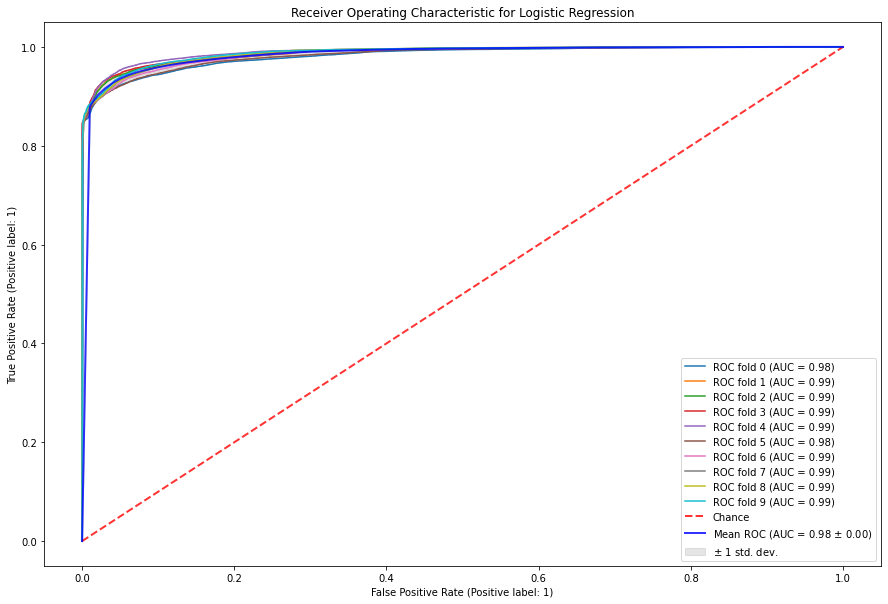

<Figure size 1080x720 with 0 Axes>

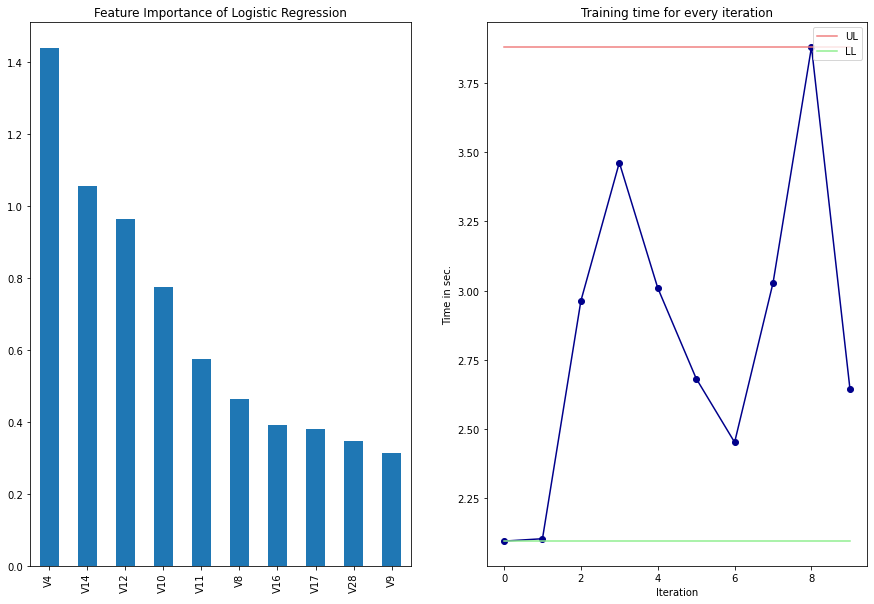

In [33]:
classifier = LogisticRegression(max_iter=1000, C= 10, penalty= 'l2')
lr_acc_smote, lr_f1_smote, lr_precision_smote, lr_recall_smote, lr_auc_smote = classification_evaluation(classifier, X, Y, "Logistic Regression", list(df.columns))

*Section 3.1.2 SGD Classifier*

Fold-0:  accuracy: 0.941965777394791  f1-score: 0.940896228104739  precision: 0.9238858991945411  recall: 0.9585446848885159  time: 2.209353446960449
Fold-1:  accuracy: 0.9404533703814432  f1-score: 0.9377046767487214  precision: 0.896345538320847  recall: 0.9830652316475716  time: 2.6304991245269775
Fold-2:  accuracy: 0.9433199092555792  f1-score: 0.9411291942937513  precision: 0.9061235974816222  recall: 0.9789481684146527  time: 3.4349899291992188
Fold-3:  accuracy: 0.9427395670295271  f1-score: 0.940186641193328  precision: 0.900073863036826  recall: 0.9840415304749087  time: 2.9082326889038086
Fold-4:  accuracy: 0.9459402423368447  f1-score: 0.9440602707817732  precision: 0.9123491962998136  recall: 0.9780551261264658  time: 2.1124484539031982
Fold-5:  accuracy: 0.9362854580307054  f1-score: 0.9349819643594206  precision: 0.9162211592571751  recall: 0.9545271334872302  time: 2.925175189971924
Fold-6:  accuracy: 0.9332606440040097  f1-score: 0.9308806119661234  precision: 0.8988111

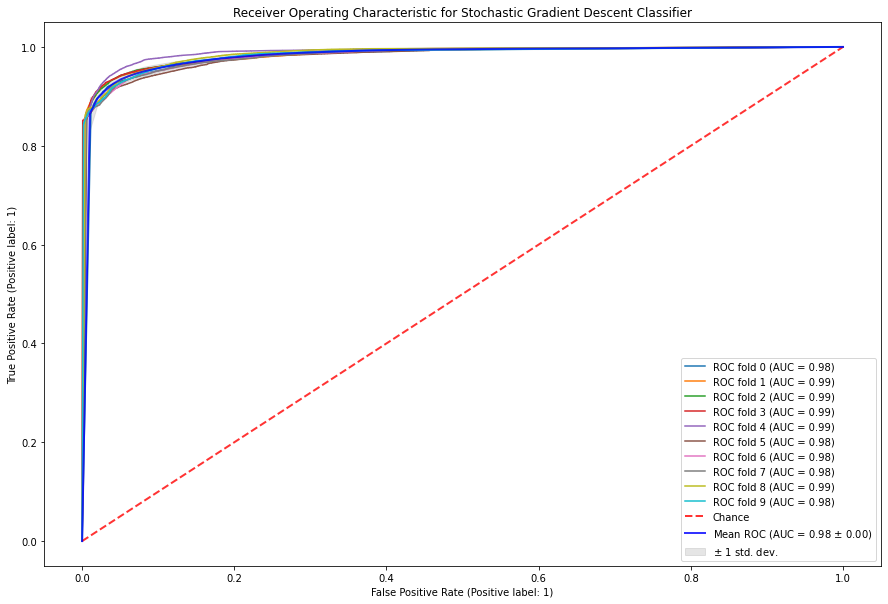

<Figure size 1080x720 with 0 Axes>

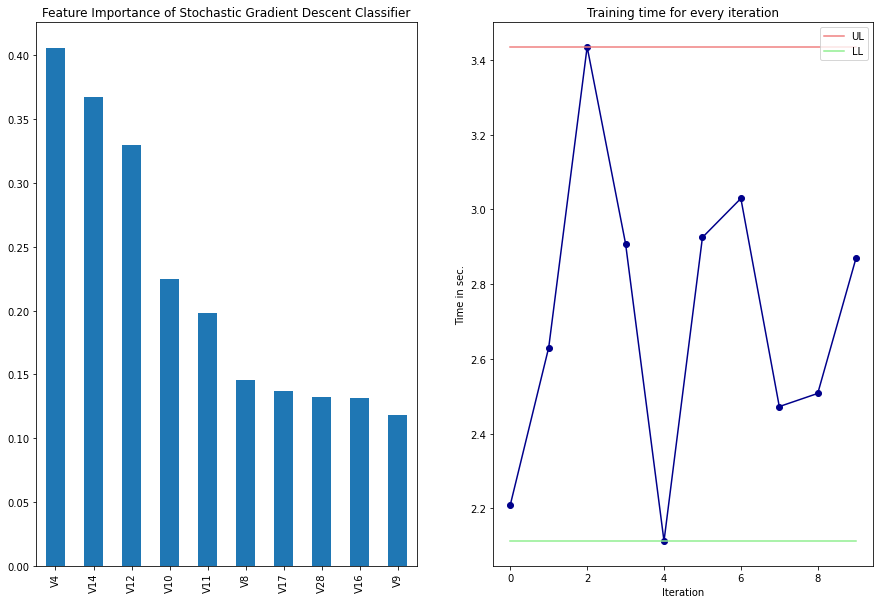

In [34]:
classifier = SGDClassifier(loss="modified_huber",alpha = 0.0001, penalty = "l2")
sgd_acc_smote, sgd_f1_smote, sgd_precision_smote, sgd_recall_smote, sgd_auc_smote = classification_evaluation(classifier, X, Y, "Stochastic Gradient Descent Classifier", list(df.columns))

Section 3.1.3 - Gaussian Naive Bayes 

Fold-0:  accuracy: 0.913001424476373  f1-score: 0.9078376213275705  precision: 0.8569870915549928  recall: 0.9651033827140933  time: 0.28415369987487793
Fold-1:  accuracy: 0.9164658917046234  f1-score: 0.9110620131815459  precision: 0.8557208680665471  recall: 0.9740561316411098  time: 0.3057072162628174
Fold-2:  accuracy: 0.9138455586233579  f1-score: 0.9082051378140867  precision: 0.8524146178467166  recall: 0.9718100890207715  time: 0.2998199462890625
Fold-3:  accuracy: 0.9162548581678772  f1-score: 0.9106767707082833  precision: 0.8538215328338785  recall: 0.9756440657529842  time: 0.2963845729827881
Fold-4:  accuracy: 0.9152524488683327  f1-score: 0.9095957227276991  precision: 0.852696000844149  recall: 0.9746321460159202  time: 0.29805612564086914
Fold-5:  accuracy: 0.9140038337759175  f1-score: 0.9084818086539902  precision: 0.8536508159819921  recall: 0.97084  time: 0.37418246269226074
Fold-6:  accuracy: 0.9138807308794823  f1-score: 0.9084690005794284  precision: 0.8547411367

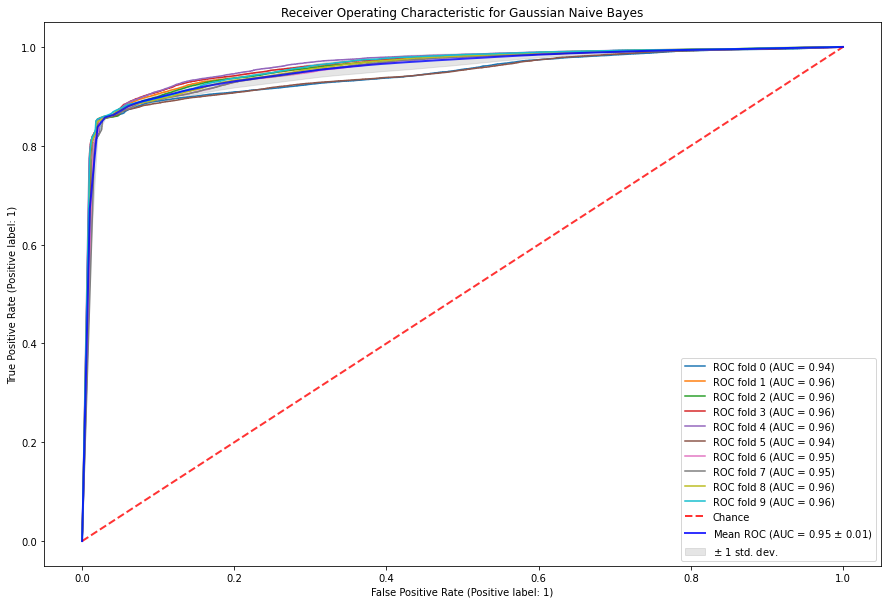

<Figure size 1080x720 with 0 Axes>

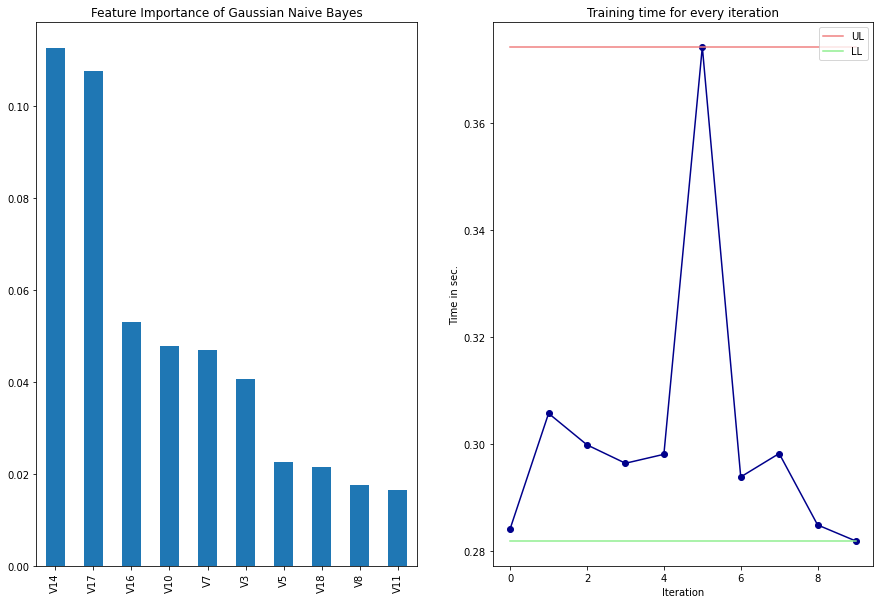

In [35]:
classifier = GaussianNB()
gn_acc_smote, gn_f1_smote, gn_precision_smote, gn_recall_smote, gn_auc_smote = classification_evaluation(classifier, X, Y, "Gaussian Naive Bayes", list(df.columns))

*Section 3.1.4 - Random Forest Classifier*

Fold-0:  accuracy: 0.9992789687494504  f1-score: 0.999279475598826  precision: 1.0  recall: 0.9985599887608879  time: 116.67111444473267
Fold-1:  accuracy: 0.9998768971035648  f1-score: 0.9998769100916141  precision: 1.0  recall: 0.9997538504817498  time: 122.88413977622986
Fold-2:  accuracy: 0.9998241387193781  f1-score: 0.9998241665494444  precision: 1.0  recall: 0.9996483949228226  time: 113.23995089530945
Fold-3:  accuracy: 0.9999120693596891  f1-score: 0.9999120755446921  precision: 1.0  recall: 0.9998241665494444  time: 114.39107012748718
Fold-4:  accuracy: 0.9998593109755025  f1-score: 0.9998593282925973  precision: 1.0  recall: 0.9997186961566863  time: 111.32154607772827
Fold-5:  accuracy: 0.9994196577739479  f1-score: 0.999420004569661  precision: 1.0  recall: 0.9988406815387317  time: 114.62802457809448
Fold-6:  accuracy: 0.9996482774387563  f1-score: 0.999648407285001  precision: 1.0  recall: 0.9992970617179812  time: 111.9985773563385
Fold-7:  accuracy: 0.999525174542321  

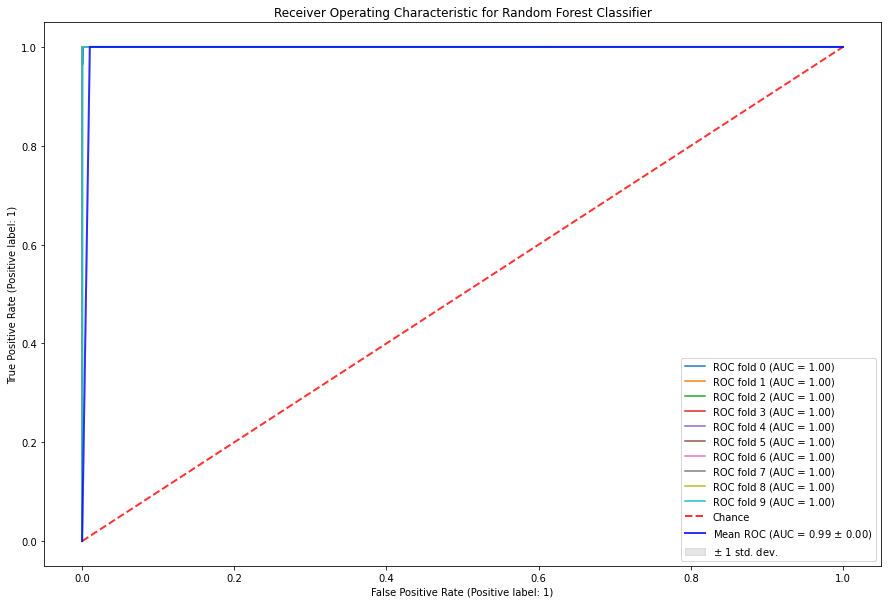

<Figure size 1080x720 with 0 Axes>

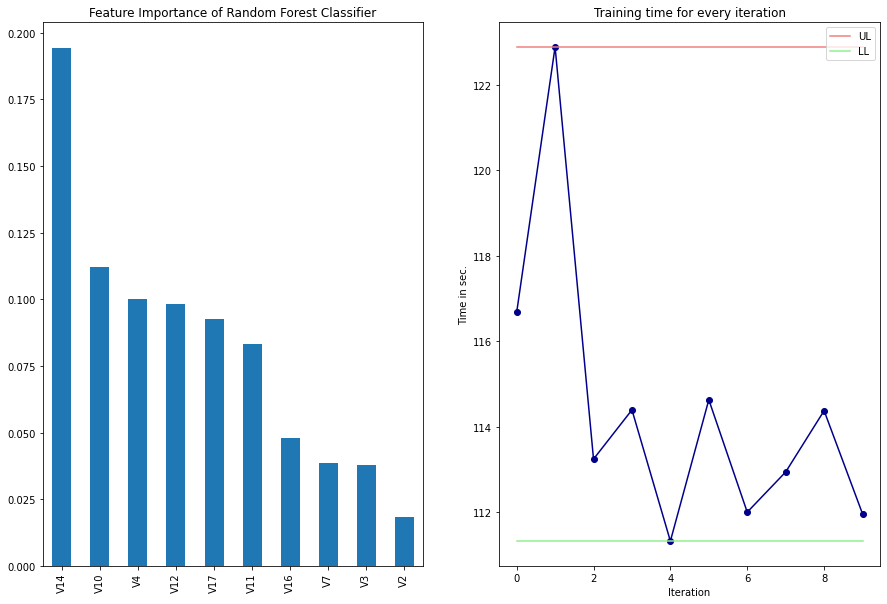

In [36]:
classifier = RandomForestClassifier(max_depth = 20, min_samples_split = 5,  n_estimators = 30)
rf_acc_smote, rf_f1_smote, rf_precision_smote, rf_recall_smote, rf_auc_smote = classification_evaluation(classifier, X, Y, "Random Forest Classifier", list(df.columns))

Section 3.1.5 - XGBoost Classifier

Fold-0:  accuracy: 0.9986458681392117  f1-score: 0.9986476280801587  precision: 0.999964827125321  recall: 0.9973338946186767  time: 123.64912700653076
Fold-1:  accuracy: 0.9997713803351916  f1-score: 0.9997714285714285  precision: 1.0  recall: 0.9995429616087751  time: 127.61572623252869
Fold-2:  accuracy: 0.9998593109755025  f1-score: 0.9998593282925973  precision: 1.0  recall: 0.9997186961566863  time: 133.66175246238708
Fold-3:  accuracy: 0.9999472416158135  f1-score: 0.9999472434713795  precision: 1.0  recall: 0.9998944925089681  time: 130.88090562820435
Fold-4:  accuracy: 0.9998417248474404  f1-score: 0.9998417471118848  precision: 1.0  recall: 0.9996835443037975  time: 131.39273238182068
Fold-5:  accuracy: 0.9989975907004555  f1-score: 0.9989985769251041  precision: 0.9999648283624085  recall: 0.998034191034507  time: 127.24439072608948
Fold-6:  accuracy: 0.9997889664632538  f1-score: 0.9997890146986427  precision: 1.0  recall: 0.9995781184081002  time: 132.94051265716553
Fold-7

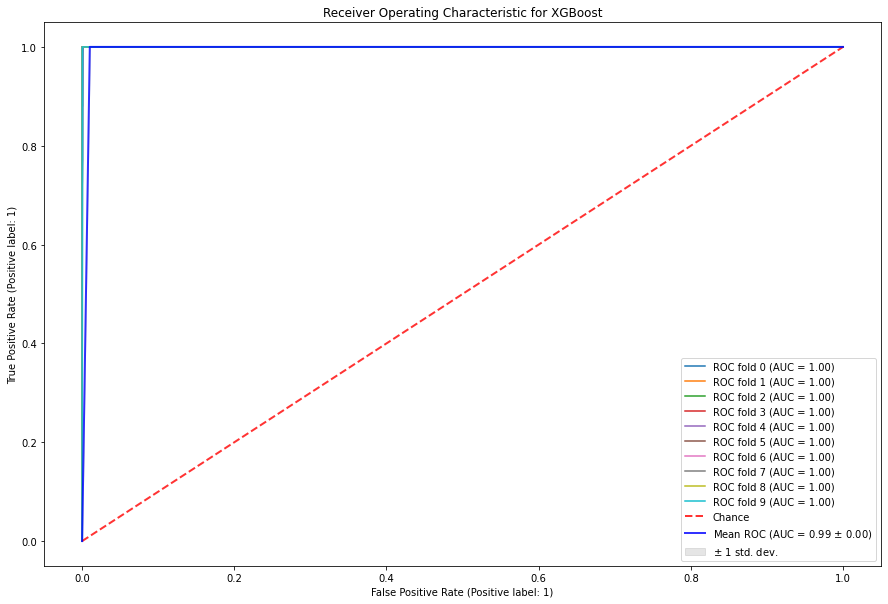

<Figure size 1080x720 with 0 Axes>

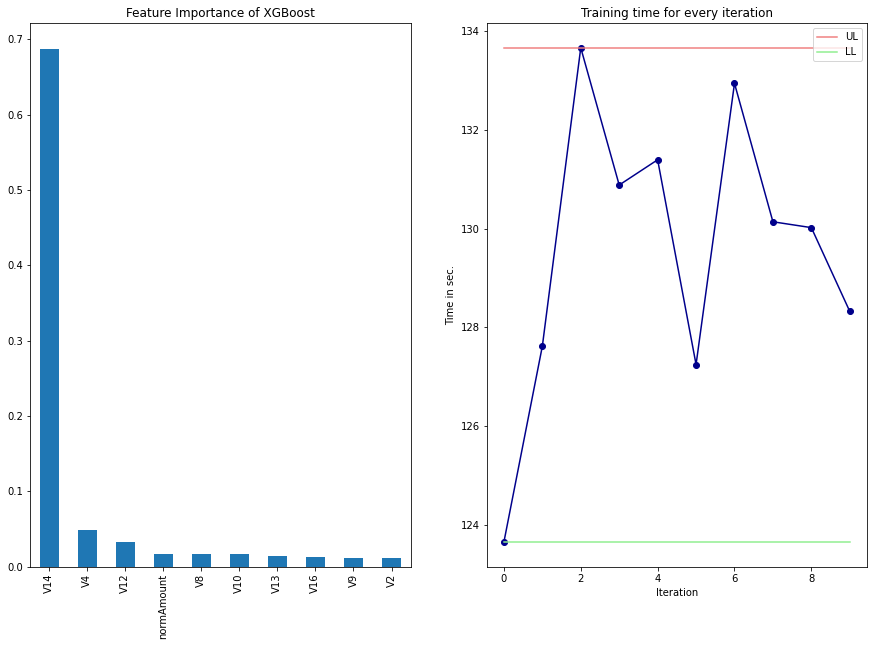

In [37]:
classifier = XGBClassifier(use_label_encoder=False, disable_default_eval_metric=1, learning_rate= 1, max_depth = 20, n_estimators = 100)
xg_acc_smote, xg_f1_smote, xg_precision_smote, xg_recall_smote, xg_auc_smote = classification_evaluation(classifier, X, Y, "XGBoost", list(df.columns))

#### **Section 3.1.6 - Observations from Model Evaluation on SMOTE Resampled Data**

| **Model Name**           | **Average Accuracy in %** | **Average F1 Score in %** | **Average Precision in %** | **Average Recall in %** | **Mean AUC Score** |
|--------------------------|---------------------------|---------------------------|----------------------------|-------------------------|--------------------|
| Logistic Regression      | 94.19                     | 94.03                     | 91.49                      | 96.72                   | 0.98 ± 0.00        |
| SGD Classifier           | 93.96                     | 93.77                     | 90.91                      | 96.84                   | 0.98 ± 0.00        |
| Gaussian Naive Bayes     | 91.46                     | 90.91                     | 85.42                      | 97.16                   | 0.95 ± 0.01        |
| Random Forest Classifier | 99.96                     | 99.96                     | 99.99                      | 99.93                   | 0.99 ± 0.00        |
| XGBoost Classifier       | 99.96                     | 99.96                     | 99.99                      | 99.92                   | 0.99 ± 0.00        |

In the above table it can be observed that they even though the accuracy has dipped a bit the average F1 score, precision and recall have improved after applying SMOTE resampling technique.


#### **Section 3.2 - Model Building and Evaluation On SMOTE Resampled Data**
Stratified K-Fold Cross Validation:
Now to observe the performance of our models we will use the StrafiedKFold from sklearn.model_selection for this task we will split our data set into 10 folds for trainng and testing data. The data will be has been balanced using SMOTE

The models that we will test are:

1. Logistic Regression
2. Naive Bayes
3. Stochastic Gradient Descent Classifier
4. Random Forest
5. XGBoost Classifier

In [23]:
X = ada_df.iloc[:, :29].values
Y = ada_df.iloc[:, 29].values

def classification_evaluation(classifier, X, Y, classifier_name, columns):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    accuracy_arr = np.zeros(shape=(1,10))
    f1_score_arr = np.zeros(shape=(1,10))
    precision_arr = np.zeros(shape=(1,10))
    recall_arr = np.zeros(shape=(1,10))
    feature_importance_arr = np.zeros(shape=(1,29))
    time_arr = []
    

    cv = StratifiedKFold(n_splits=10)
    fig, ax = plt.subplots(figsize=(15, 10))
    start_time = time.time()
    for i, (train, test) in enumerate(cv.split(X, Y)):
        itr_start_time = time.time()
        classifier.fit(X[train], Y[train])
        itr_end_time = time.time()
        viz = RocCurveDisplay.from_estimator(classifier, X[test], Y[test],
                             name=f'ROC fold {i}',ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        try:
            feature_importance_arr += classifier.feature_importances_
        except:
            try:
                feature_importance_arr += np.array([abs(i) for i in classifier.coef_[0]])
            except:
                feature_importance_arr += np.array([abs(i) for i in permutation_importance(classifier, X[test], Y[test]).importances_mean])
            
        
        predict = classifier.predict(X[test])
        accuracy = classifier.score(X[test], Y[test])
        accuracy_arr[0, i] = accuracy
        f1 = f1_score(predict, Y[test])
        f1_score_arr[0, i] = f1
        precision = precision_score(predict, Y[test])
        precision_arr[0, i] = precision
        recall = recall_score(predict, Y[test])
        recall_arr[0, i] = recall
        train, test = train, test
        time_arr.append(itr_end_time-itr_start_time)
        print(f"Fold-{i}:  accuracy: {accuracy}  f1-score: {f1}  precision: {precision}  recall: {recall}  time: {itr_end_time-itr_start_time}")
    end_time = time.time()
    
    print()
    print(f"Classification Report for {classifier_name}")
    print("Average Accuracy :", np.mean(accuracy_arr))
    print("Average F1-Score :", np.mean(f1_score_arr))
    print("Average Precision :", np.mean(precision_arr))
    print("Average Recall :", np.mean(recall_arr))
    print("Total Time :", end_time - start_time)
    
    fig = plt.figure(figsize=(15, 10))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title=f"Receiver Operating Characteristic for {classifier_name}")
    ax.legend(loc="lower right")
    plt.show()
    
    feature_importance_arr /= 10
    
    fig = plt.figure(figsize=(15, 10))
    
    plt.subplot(1, 2, 1)
    feature_imp = pd.Series(feature_importance_arr[0], index = columns[:29])
    feature_imp.nlargest(10).plot(kind = 'bar')
    plt.title(f"Feature Importance of {classifier_name}")
    
    
    plt.subplot(1,2,2)
    plt.plot(time_arr, 'go-', color="darkblue")
    plt.plot([max(time_arr) for i in range(10)], color='lightcoral', label='UL')
    plt.plot([min(time_arr) for i in range(10)], color='lightgreen', label='LL')
    plt.title("Training time for every iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Time in sec.")
    plt.legend(loc="upper right")
    
    plt.show()
    
    return np.mean(accuracy_arr), np.mean(f1_score_arr), np.mean(precision_arr), np.mean(recall_arr), mean_auc

*Section 3.2.1 - Logistic Regression*

Fold-0:  accuracy: 0.9112588371847631  f1-score: 0.9168534141840231  precision: 0.9785789658811115  recall: 0.8624527249054498  time: 2.9837868213653564
Fold-1:  accuracy: 0.8631071717491471  f1-score: 0.8571428571428572  precision: 0.8213858600070348  recall: 0.896154731752245  time: 2.1834733486175537
Fold-2:  accuracy: 0.8443072702331962  f1-score: 0.833254854688942  precision: 0.7780513542033064  recall: 0.8968900782548758  time: 2.168003797531128
Fold-3:  accuracy: 0.766100383384334  f1-score: 0.7208345577431677  precision: 0.6039746746394653  recall: 0.8937643139704351  time: 2.1115643978118896
Fold-4:  accuracy: 0.82570081952798  f1-score: 0.8038163859142105  precision: 0.7141751670770313  recall: 0.9191905473312508  time: 2.176333427429199
Fold-5:  accuracy: 0.8964844093491146  f1-score: 0.9006582278481012  precision: 0.9385156524797749  recall: 0.8657365347177157  time: 2.2245466709136963
Fold-6:  accuracy: 0.8421413622693937  f1-score: 0.836609873307121  precision: 0.80830109

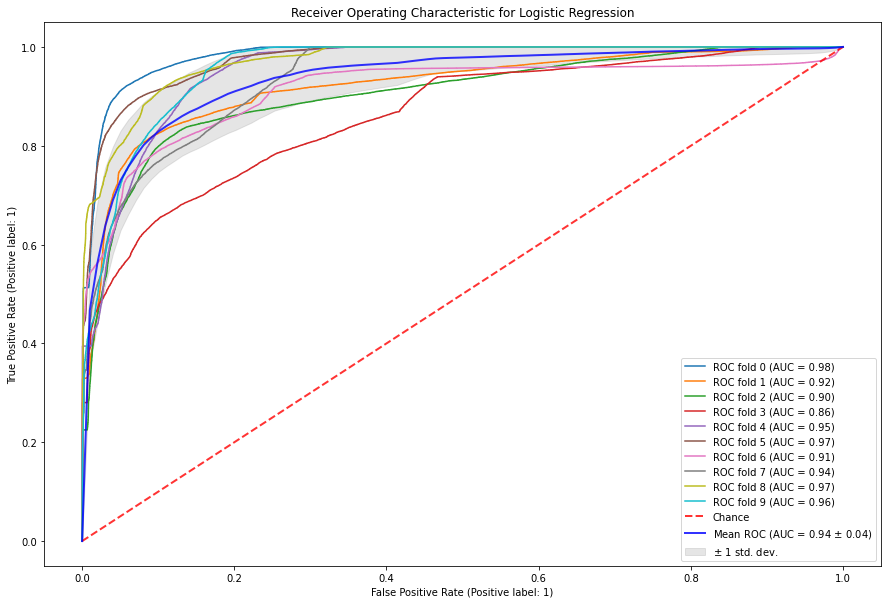

<Figure size 1080x720 with 0 Axes>

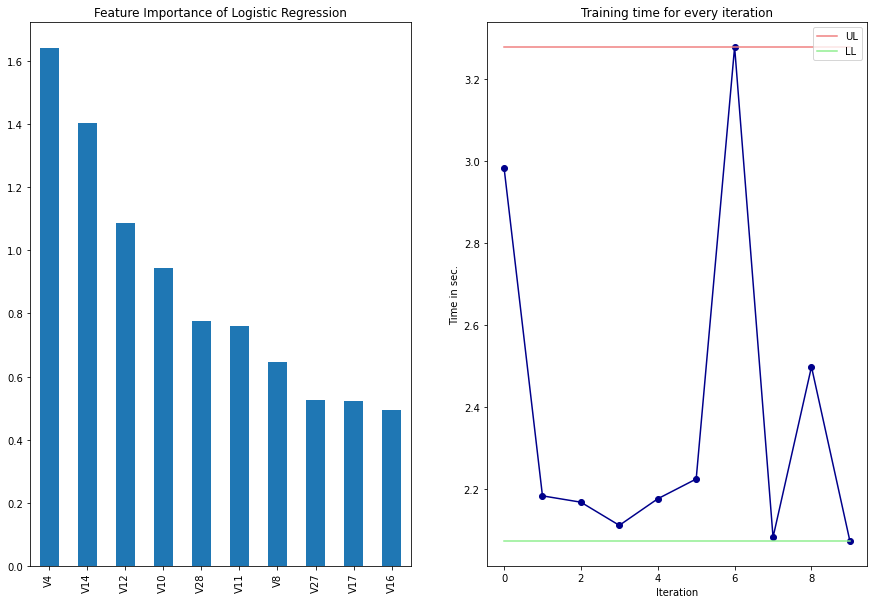

In [24]:
classifier = LogisticRegression(max_iter=1000, C= 1, penalty= 'l2')
lr_acc_ada, lr_f1_ada, lr_precision_ada, lr_recall_ada, lr_auc_ada = classification_evaluation(classifier, X, Y, "Logistic Regression", list(df.columns))

*Section 3.2.2 - SGD Classifier*

Fold-0:  accuracy: 0.9207203404734269  f1-score: 0.9249642131895203  precision: 0.9773126978543791  recall: 0.8779385743174924  time: 1.2443478107452393
Fold-1:  accuracy: 0.8577257219232528  f1-score: 0.8515269417119365  precision: 0.8160042208934224  recall: 0.8902832143679484  time: 1.6209285259246826
Fold-2:  accuracy: 0.8509197706728571  f1-score: 0.8415898940444377  precision: 0.7920506507210693  recall: 0.8977395048439182  time: 1.313258409500122
Fold-3:  accuracy: 0.7698111216629735  f1-score: 0.7249458885830165  precision: 0.6067182553640521  recall: 0.9004019418489325  time: 1.2358424663543701
Fold-4:  accuracy: 0.8208821356969506  f1-score: 0.7953463138224124  precision: 0.6961308476960957  recall: 0.9275437034259737  time: 1.2376232147216797
Fold-5:  accuracy: 0.89488401540599  f1-score: 0.898483278699662  precision: 0.9303552585297221  recall: 0.8687226984596184  time: 1.3958141803741455
Fold-6:  accuracy: 0.8248008300944408  f1-score: 0.814846479815627  precision: 0.77105

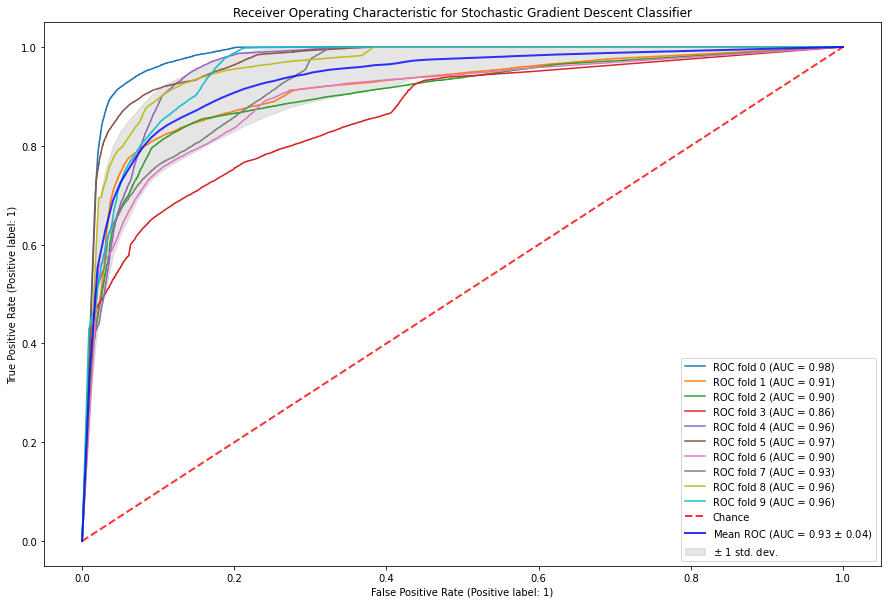

<Figure size 1080x720 with 0 Axes>

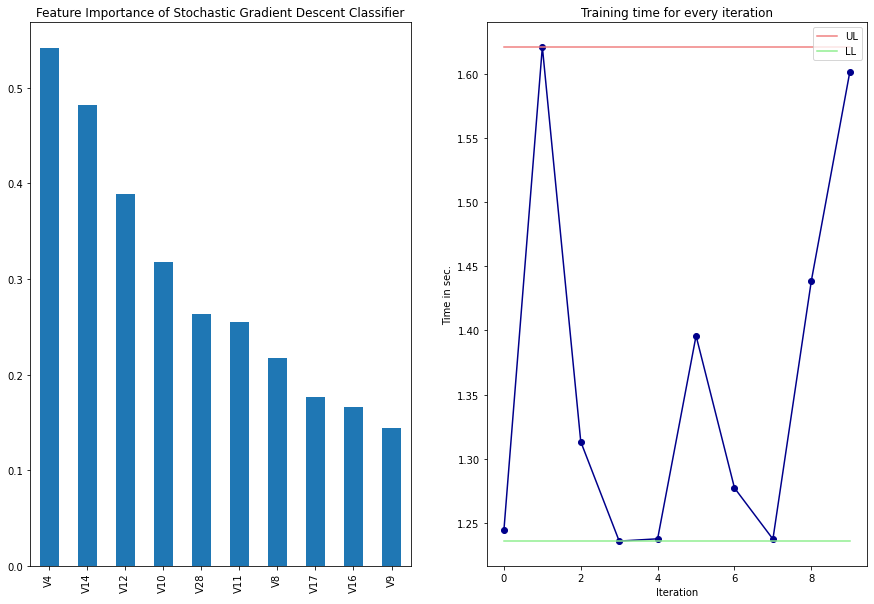

In [25]:
classifier = SGDClassifier(loss="modified_huber",alpha = 0.001, penalty = "l2")
sgd_acc_ada, sgd_f1_ada, sgd_precision_ada, sgd_recall_ada, sgd_auc_ada = classification_evaluation(classifier, X, Y, "Stochastic Gradient Descent Classifier", list(df.columns))

*Section 3.3.3 Gaussian Naive Bayes*

Fold-0:  accuracy: 0.7962611234216173  f1-score: 0.7624710393045333  precision: 0.6540274358072459  recall: 0.9140244801651674  time: 0.2924468517303467
Fold-1:  accuracy: 0.6877879779114348  f1-score: 0.5722065591941974  precision: 0.41762223003869153  recall: 0.908485729589104  time: 0.30997681617736816
Fold-2:  accuracy: 0.613995286834793  f1-score: 0.41555052589535346  precision: 0.27446359479423144  recall: 0.8551232876712329  time: 0.2931644916534424
Fold-3:  accuracy: 0.6556575568921248  f1-score: 0.5061043285238623  precision: 0.3528666901160746  recall: 0.8945960406634564  time: 0.2973613739013672
Fold-4:  accuracy: 0.6759171327072562  f1-score: 0.5490627905838594  precision: 0.39461836088638763  recall: 0.9021389514313284  time: 0.2936136722564697
Fold-5:  accuracy: 0.7937953957897329  f1-score: 0.7548763406016765  precision: 0.635033415406261  recall: 0.9304746688656393  time: 0.28359293937683105
Fold-6:  accuracy: 0.7993703944707269  f1-score: 0.7623828369089773  precision:

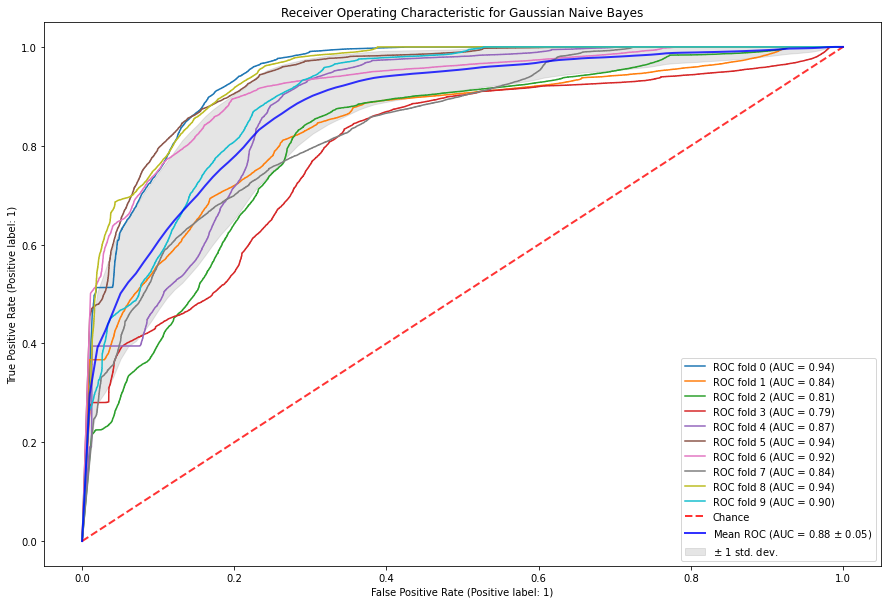

<Figure size 1080x720 with 0 Axes>

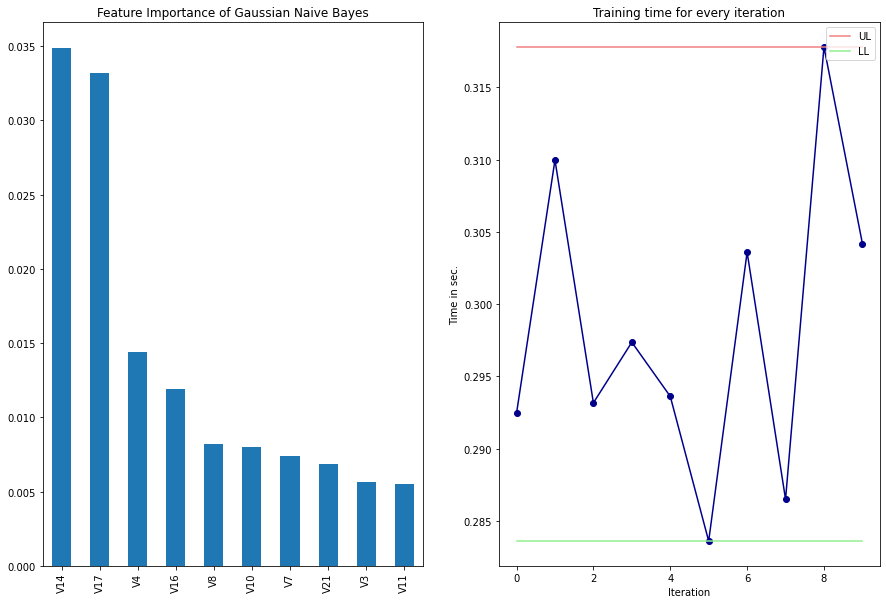

In [26]:
classifier = GaussianNB()
gn_acc_ada, gn_f1_ada, gn_precision_ada, gn_recall_ada, gn_auc_ada = classification_evaluation(classifier, X, Y, "Gaussian Naive Bayes", list(df.columns))

*Section 3.2.4 - Random Forest Classifier*

Fold-0:  accuracy: 0.9578804825718406  f1-score: 0.9561523955987624  precision: 0.9185015828350335  recall: 0.9970218777442633  time: 69.64507865905762
Fold-1:  accuracy: 0.934086032851465  f1-score: 0.9295594647421439  precision: 0.8698557861413999  recall: 0.9980627976430705  time: 70.4249861240387
Fold-2:  accuracy: 0.930023565826035  f1-score: 0.9248834267806912  precision: 0.8616250439676398  recall: 0.9981663338902246  time: 71.29390072822571
Fold-3:  accuracy: 0.8631599310611656  f1-score: 0.8418013622039239  precision: 0.7281744635947942  recall: 0.9974463984582028  time: 71.83930134773254
Fold-4:  accuracy: 0.8592733284091308  f1-score: 0.8366271947733769  precision: 0.7206823777699614  recall: 0.9970316301703163  time: 71.13142013549805
Fold-5:  accuracy: 0.9117848789152495  f1-score: 0.9034233124109515  precision: 0.8252198381990855  recall: 0.9980006806193636  time: 69.4008538722992
Fold-6:  accuracy: 0.9053305429028684  f1-score: 0.8956236790568709  precision: 0.8123461132

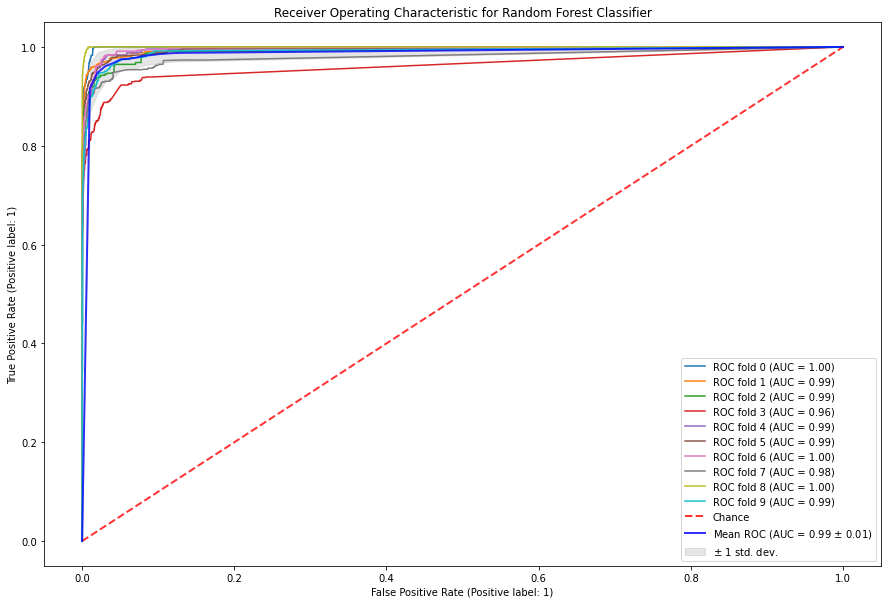

<Figure size 1080x720 with 0 Axes>

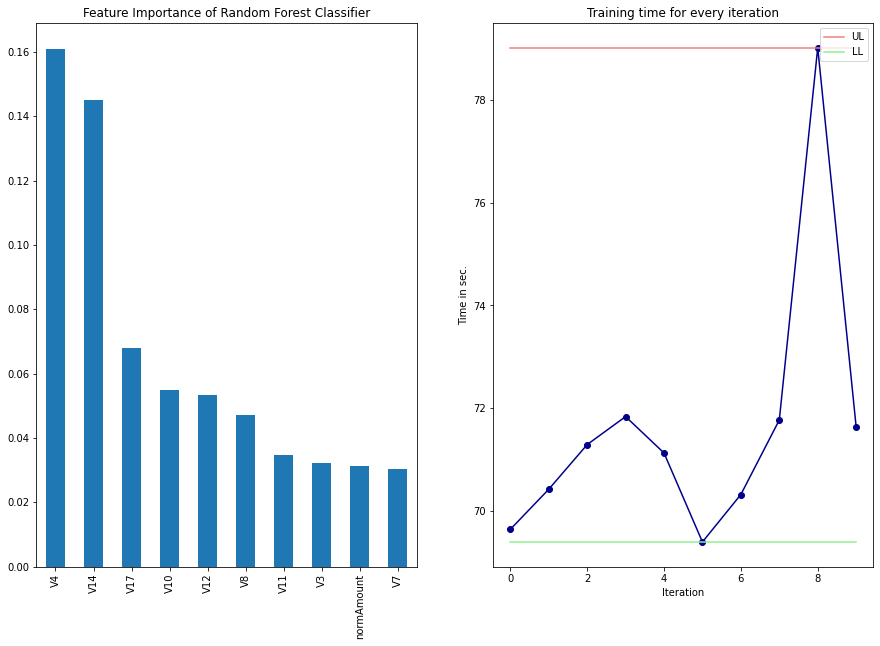

In [27]:
classifier = RandomForestClassifier(max_depth = 20, min_samples_split = 10, n_estimators = 20)
rf_acc_ada, rf_f1_ada, rf_precision_ada, rf_recall_ada, rf_auc_ada = classification_evaluation(classifier, X, Y, "Random Forest Classifier", list(df.columns))

*Section 3.2.5 - XGBoost Classifier*

Fold-0:  accuracy: 0.961855017410573  f1-score: 0.9604464139176103  precision: 0.9262750615546957  recall: 0.997235581474609  time: 156.46697998046875
Fold-1:  accuracy: 0.9598501635538672  f1-score: 0.9581906418826114  precision: 0.9201899402040099  recall: 0.9994651384909264  time: 149.23108291625977
Fold-2:  accuracy: 0.9524638598712672  f1-score: 0.9501171867791168  precision: 0.9054519873373197  recall: 0.9994176340412315  time: 169.49842977523804
Fold-3:  accuracy: 0.879286694101509  f1-score: 0.862763915547025  precision: 0.7589166373549068  recall: 0.9995367367738349  time: 147.37123036384583
Fold-4:  accuracy: 0.9078118954662164  f1-score: 0.8984777472208235  precision: 0.8158986985578615  recall: 0.9996552318565765  time: 139.84187412261963
Fold-5:  accuracy: 0.9292133448233412  f1-score: 0.9239805843579428  precision: 0.8603939500527612  recall: 0.9977158706203858  time: 150.3446009159088
Fold-6:  accuracy: 0.9519178347197552  f1-score: 0.9495124833801152  precision: 0.90429

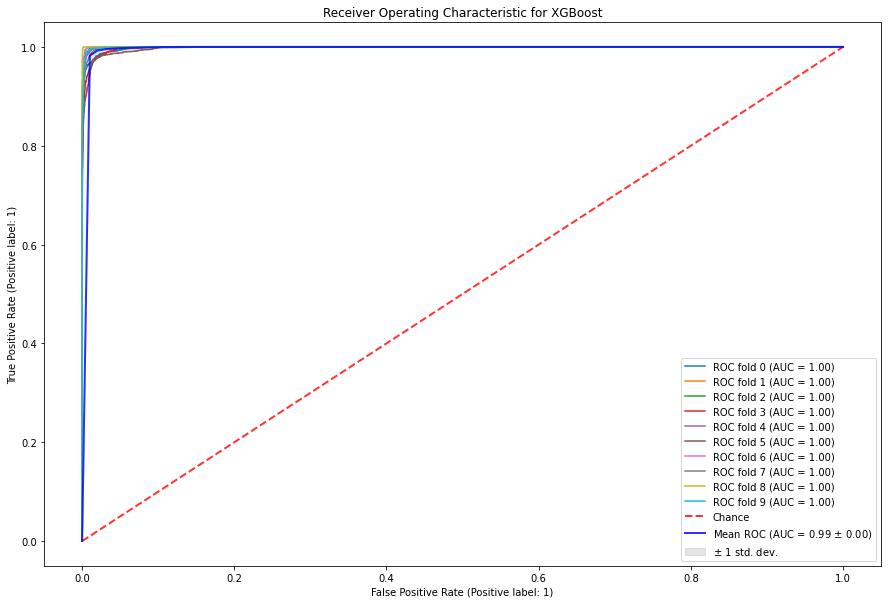

<Figure size 1080x720 with 0 Axes>

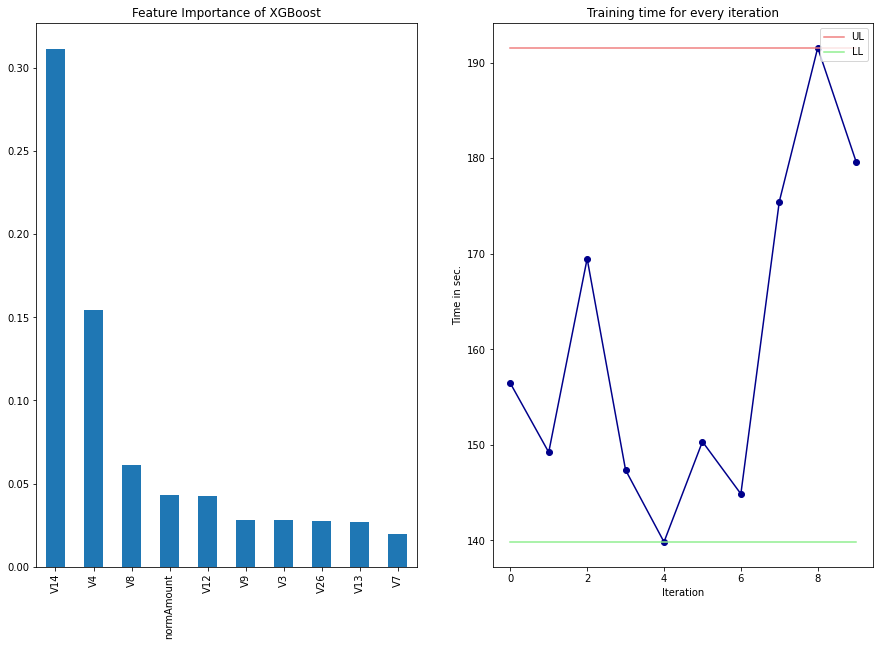

In [28]:
classifier = XGBClassifier(use_label_encoder=False, disable_default_eval_metric=1, learning_rate= 1, max_depth = 20, n_estimators = 100)
xg_acc_ada, xg_f1_ada, xg_precision_ada, xg_recall_ada, xg_auc_ada = classification_evaluation(classifier, X, Y, "XGBoost", list(df.columns))

#### **Section 3.2.6 - Observations of Model Evaluation on ADASYN Resampled Data**
| **Model Name**           | **Average Accuracy in %** | **Average F1 Score in %** | **Average Precision in %** | **Average Recall in %** | **Mean AUC Score** |
|--------------------------|---------------------------|---------------------------|----------------------------|-------------------------|--------------------|
| Logistic Regression      | 85.58                     | 84.62                     | 81.59                      | 88.82                   | 0.94 ± 0.04        |
| SGD Classifier           | 85.53                     | 84.26                     | 80.77                      | 89.03                   | 0.93 ± 0.04        |
| Gaussian Naive Bayes     | 91.50                     | 90.95                     | 85.46                      | 97.20                   | 0.88 ± 0.05        |
| Random Forest Classifier | 90.86                     | 89.76                     | 81.91                      | 99.97                   | 0.99 ± 0.01        |
| XGBoost Classifier       | 93.61                     | 93.06                     | 87.30                      | 99.91                   | 0.99 ± 0.00        |

In the above table it is clearly observed that the ADASYN resampled data did not perform well as compared to the SMOTE resampled data. So we will be using SMOTE for further evaluation. 

### **Section 3 - Observations of Model Evaluation Using Different Sampling Techniques.**

As it can be observed from the above model evaluations using SMOTE and ADASYN resampling technqiue. It can be seen that SMOTE resampled data performed better than the ADASYN resampled data. Tgis can be observed from the performance of the models.

### **Section 4 - Hybrid Model Creation**

In this hybrid model we will try to use the weighted average of the probabilities of all the models which clear the threshold and compare it with the result of individual predictions. It is believed that a hybrid model is bound to give better or more generalized results as any models having a bias will be neutralized in this process. Also as different models give priority to different features. A hybrid model will be able to give a more generalised model based on feature importance too.

Threshold:
1. Accuracy > 90
2. f1 > 90
3. auc > 90



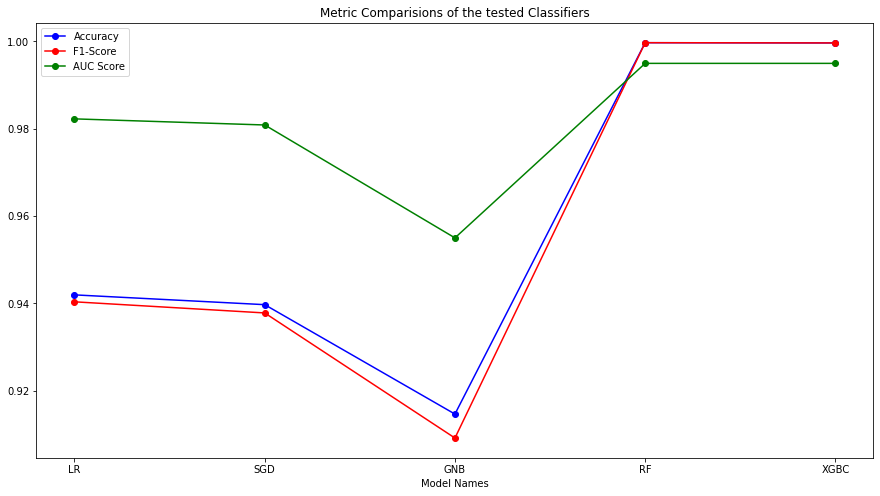

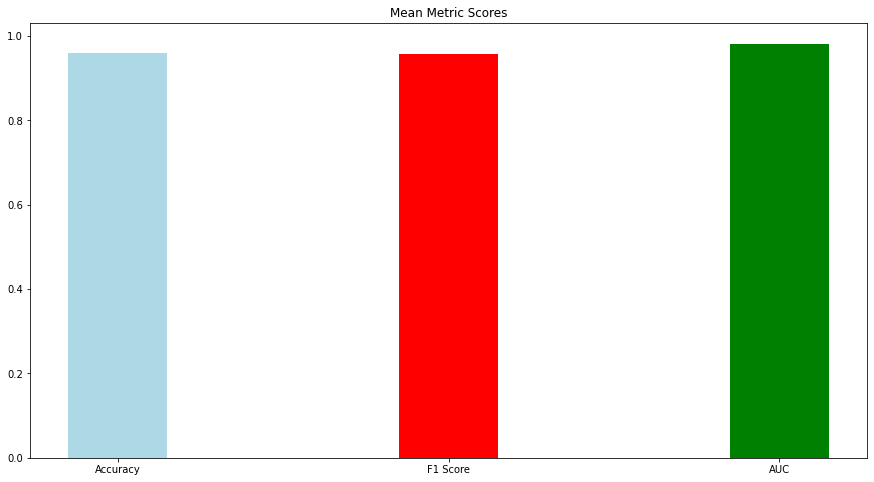

In [38]:
accuracy = [lr_acc_smote, sgd_acc_smote, gn_acc_smote, rf_acc_smote, xg_acc_smote]
f1_scores = [lr_f1_smote, sgd_f1_smote, gn_f1_smote, rf_f1_smote, xg_f1_smote]
auc_scores = [lr_auc_smote, sgd_auc_smote, gn_auc_smote, rf_auc_smote, xg_auc_smote]

mean_acc = sum(accuracy)/5
mean_f1 = sum(f1_scores)/5
mean_auc = sum(auc_scores)/5

fig = plt.figure(figsize=(15,8))
plt.title("Metric Comparisions of the tested Classifiers")
plt.plot(accuracy,'go-', color="blue", label="Accuracy")
plt.plot(f1_scores,'go-', color="red", label="F1-Score")
plt.plot(auc_scores,'go-', color="green", label="AUC Score")
plt.xticks([i for i in range(5)], ["LR", "SGD", "GNB", "RF", "XGBC"])
plt.legend()
plt.xlabel('Model Names')
plt.show()

fig = plt.figure(figsize=(15,8))
plt.title("Mean Metric Scores")
plt.bar(height=[mean_acc, mean_f1, mean_auc], x = ["Accuracy", "F1 Score", "AUC"], width=.3, color=["lightblue", "red", "green"])
plt.show()

In [39]:
X = smote_df.iloc[:, :29].values
Y = smote_df.iloc[:, 29].values

In [42]:
def hybrid_model_formation(clf1, clf2, clf3, clf4, clf5, X, Y, columns):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
    
    print("Phase 1 Started")
    print("Training Models and Generating Report:")
    print("------------------------------------------------------------------------------------------------------")
    try:
        t1 = time.time()
        clf1.fit(x_train, y_train)
        clf1_acc = clf1.score(x_test, y_test)
        pred1 = clf1.predict(x_test)
        clf1_f1 = f1_score(pred1, y_test)
        clf1_pre = precision_score(pred1, y_test)
        clf1_rec = recall_score(pred1, y_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf1.predict_proba(x_test)[:, 1])
        clf1_auc = metrics.auc(fpr, tpr)
        feature_imp1 = pd.Series([abs(i) for i in clf1.coef_[0]], index = columns[:29])
        t1_ = time.time()
        final_t1 = t1_ - t1
        print("Model 1 Trained and Tested: ")
        print("Accuracy: ", clf1_acc)
        print("F1 Score:", clf1_f1)
        print("AUC Score: ", clf1_auc)
        print("Precision Score: ", clf1_pre)
        print("Recall Score: ", clf1_rec)
        print("Time :", final_t1)
        
        print("------------------------------------------------------------------------------------------------------")
        t2 = time.time()
        clf2.fit(x_train, y_train)
        clf2_acc = clf2.score(x_test, y_test)
        pred2 = clf2.predict(x_test)
        clf2_pre = precision_score(pred2, y_test)
        clf2_rec = recall_score(pred2, y_test)
        clf2_f1 = f1_score(pred2, y_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf2.predict_proba(x_test)[:, 1])
        clf2_auc = metrics.auc(fpr, tpr)
        feature_imp2 = pd.Series([abs(i) for i in clf2.coef_[0]], index = columns[:29])
        t2_ = time.time()
        final_t2 = t2_ - t2
        print("Model 2 Trained and Tested: ")
        print("Accuracy: ", clf2_acc)
        print("F1 Score:", clf2_f1)
        print("AUC Score: ", clf2_auc)
        print("Precision Score: ", clf2_pre)
        print("Recall Score: ", clf2_rec)
        print("Time :", final_t2)
        
        print("------------------------------------------------------------------------------------------------------")
        t3 = time.time()
        clf3.fit(x_train, y_train)
        clf3_acc = clf3.score(x_test, y_test)
        pred3 = clf3.predict(x_test)
        clf3_f1 = f1_score(pred3, y_test)
        clf3_pre = precision_score(pred3, y_test)
        clf3_rec = recall_score(pred3, y_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf3.predict_proba(x_test)[:, 1])
        clf3_auc = metrics.auc(fpr, tpr)
        feature_imp3 = pd.Series([abs(i) for i in permutation_importance(clf3, x_test, y_test).importances_mean], index = columns[:29])
        t3_ = time.time()
        final_t3 = t3_ - t3
        print("Model 3 Trained and Tested: ")
        print("Accuracy: ", clf3_acc)
        print("F1 Score:", clf3_f1)
        print("AUC Score: ", clf3_auc)
        print("Precision Score: ", clf3_pre)
        print("Recall Score: ", clf3_rec)
        print("Time :", final_t3)
        
        print("------------------------------------------------------------------------------------------------------")
        t4 = time.time()
        clf4.fit(x_train, y_train)
        clf4_acc = clf4.score(x_test, y_test)
        pred4 = clf4.predict(x_test)
        clf4_f1 = f1_score(pred4, y_test)
        clf4_pre = precision_score(pred4, y_test)
        clf4_rec = recall_score(pred4, y_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf4.predict_proba(x_test)[:, 1])
        clf4_auc = metrics.auc(fpr, tpr)
        feature_imp4 = pd.Series(clf4.feature_importances_, index = columns[:29])
        t4_ = time.time()
        final_t4 = t4_ - t4
        print("Model 4 Trained and Tested: ")
        print("Accuracy: ", clf4_acc)
        print("F1 Score:", clf4_f1)
        print("AUC Score: ", clf4_auc)
        print("Precision Score: ", clf4_pre)
        print("Recall Score: ", clf4_rec)
        print("Time :", final_t4)
        
        print("------------------------------------------------------------------------------------------------------")
        t5 = time.time()
        clf5.fit(x_train, y_train)
        clf5_acc = clf5.score(x_test, y_test)
        pred5 = clf5.predict(x_test)
        clf5_f1 = f1_score(pred5, y_test)
        clf5_pre = precision_score(pred5, y_test)
        clf5_rec = recall_score(pred5, y_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf5.predict_proba(x_test)[:, 1])
        clf5_auc = metrics.auc(fpr, tpr)
        feature_imp5 = pd.Series(clf5.feature_importances_, index = columns[:29])
        t5_ = time.time()
        final_t5 = t5_ - t5
        print("Model 5 Trained and Tested: ")
        print("Accuracy: ", clf5_acc)
        print("F1 Score:", clf5_f1)
        print("AUC Score: ", clf5_auc)
        print("Precision Score: ", clf5_pre)
        print("Recall Score: ", clf5_rec)
        print("Time :", final_t5)
        print("------------------------------------------------------------------------------------------------------")
        print("Process Successfully completed without any errors....")
    except:
        print("Error Occured during model training and evaluation....")
        return "Error!!"
    
    print()
    print("Phase 2 Started")
    print("The slelection process has started....")
    all_classifiers = [clf1, clf2, clf3, clf4, clf5]
    all_classifiers_names = ["clf1", "clf2", "clf3", "clf4", "clf5"]
    selected_classifiers = [0 for i in range(5)]
    classifiers = {"clf1":clf1, "clf2":clf2, "clf3":clf3, "clf4":clf4, "clf5":clf5}
    accuracys = [clf1_acc, clf2_acc, clf3_acc, clf4_acc, clf5_acc]
    f1_scores = [clf1_f1, clf2_f1, clf3_f1, clf4_f1, clf5_f1]
    auc_scores = [clf1_auc, clf2_auc, clf3_auc, clf4_auc, clf5_auc]
    precision_scores = [clf1_pre, clf2_pre, clf3_pre, clf4_pre, clf5_pre]
    recall_scores = [clf1_rec, clf2_rec, clf3_rec, clf4_rec, clf5_rec]
    train_time = [final_t1, final_t2, final_t3, final_t4, final_t5]
    f_imp = [feature_imp1, feature_imp2, feature_imp3, feature_imp4, feature_imp5]
    
    fig = plt.figure(figsize=(15, 10))
    for o in range(5):
        plt.subplot(3,2,o+1)
        f_imp[o].nlargest(10).plot(kind = 'barh')
        plt.title(f"Feature Importance of {all_classifiers_names[o]}")
    
    
    fig = plt.figure(figsize=(15, 8))
    plt.plot([i*100 for i in accuracys], 'go-', color='lightblue', label='Accuracy')
    plt.plot([i*100 for i in f1_scores], 'go-', color='red', label='F1-Score')
    plt.plot([i*100 for i in auc_scores], 'go-', color='green', label='AUC-Score')
    plt.plot(train_time, 'go-', color='darkblue', label='Train Time(sec)')
    plt.title('Model Performance')
    plt.legend()
    plt.xticks([i for i in range(5)], all_classifiers_names)
    plt.xlabel('Model Names')
    plt.show()
    
    for i in range(5):
        if accuracys[i] >= .90 and f1_scores[i] >= .90 and auc_scores[i] >= .90 and precision_scores[i] >= 0.9 and recall_scores[i] >= 0.9:
            selected_classifiers[i] = 1
            
    for j in range(5):
        if not selected_classifiers[j]:
            all_classifiers[j] = None
            all_classifiers_names[j] = None
            f1_scores[j] = None
            
    all_classifiers = [i for i in all_classifiers if i != None]
    all_classifiers_names = [i for i in all_classifiers_names if i != None]
    f1_scores = [i for i in f1_scores if i != None]
    
    print("The selected classifiers are: ")
    for i in range(len(all_classifiers)):
        print(f"{i+1}. {all_classifiers_names[i]}")
    
    print()
    print("Phase 3 Started")
    # Final testing with formula:
    numerator = []
    denominator = sum([i for i in f1_scores])
    for i in range(len(all_classifiers)):
        proba = all_classifiers[i].predict_proba(x_test)[:, 1]
        # print(proba)
        final_num = np.array([x*f1_scores[i] for x in proba])
        numerator.append(final_num)
        
    numerator_val = np.zeros(shape=y_test.shape)
    for j in range(len(numerator)):
        numerator_val += numerator[j]
        
    numerator_val /= denominator
    
    for i in range(len(numerator_val)):
        if numerator_val[i] > 0.5:
            numerator_val[i] = 1
        else:
            numerator_val[i] = 0
    
    print("The final model is ready and has been evaluated the results are as following:")
    print("Accuracy :", metrics.accuracy_score(numerator_val, y_test))
    print("F1 Score :", f1_score(numerator_val, y_test))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, numerator_val)
    print("AUC Score: ", metrics.auc(fpr, tpr))
    print("Average Precision :", precision_score(numerator_val, y_test))
    print("Average Recall :", recall_score(numerator_val, y_test))
    print("Compilation successful!")

Phase 1 Started
Training Models and Generating Report:
------------------------------------------------------------------------------------------------------
Model 1 Trained and Tested: 
Accuracy:  0.9454126584949791
F1 Score: 0.9437945895049433
AUC Score:  0.9881553861561315
Precision Score:  0.9176408450704225
Recall Score:  0.9714828897338403
Time : 1.8833365440368652
------------------------------------------------------------------------------------------------------
Model 2 Trained and Tested: 
Accuracy:  0.9389585494961574
F1 Score: 0.9363679694947569
AUC Score:  0.98496806825565
Precision Score:  0.8992429577464789
Recall Score:  0.9766903778491662
Time : 2.4834842681884766
------------------------------------------------------------------------------------------------------
Model 3 Trained and Tested: 
Accuracy:  0.9152260696762394
F1 Score: 0.9098019403669296
AUC Score:  0.9570223852513245
Precision Score:  0.8560387323943662
Recall Score:  0.9707708587058518
Time : 10.446981

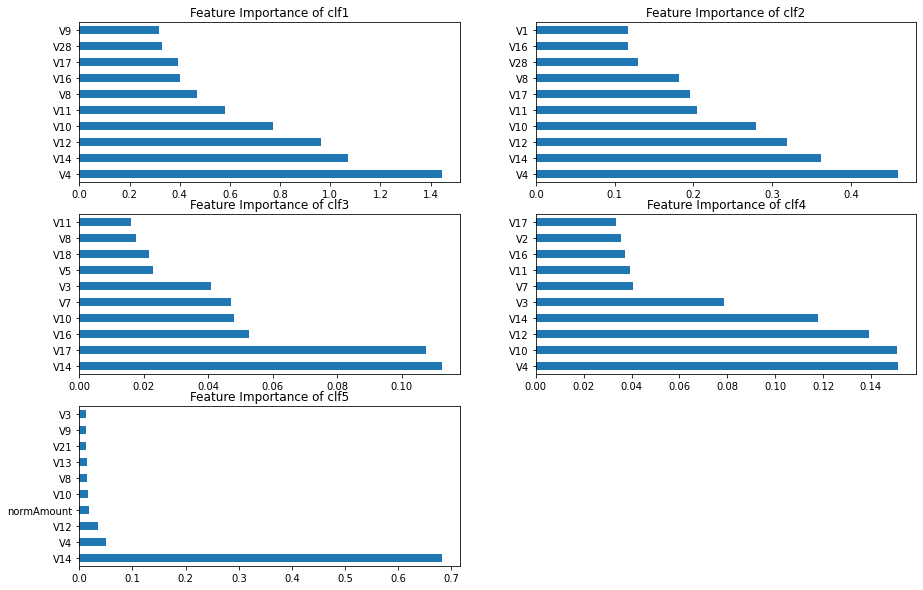

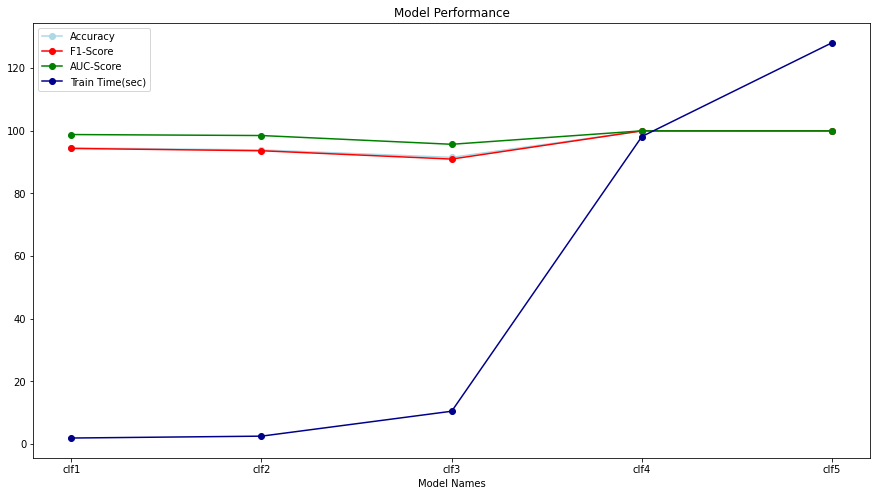

The selected classifiers are: 
1. clf1
2. clf4
3. clf5

Phase 3 Started
The final model is ready and has been evaluated the results are as following:
Accuracy : 0.9997713803351916
F1 Score : 0.9997711791315369
AUC Score:  0.9997716333485578
Average Precision : 1.0
Average Recall : 0.9995424629570971
Compilation successful!


In [43]:
hybrid_model_formation(LogisticRegression(max_iter=1000, C= 10, penalty= 'l2'), SGDClassifier(loss="modified_huber",alpha = 0.0001, penalty = "l2"), 
                      GaussianNB(), RandomForestClassifier(max_depth = 20, min_samples_split = 5,  n_estimators = 30), 
                       XGBClassifier(use_label_encoder=False, disable_default_eval_metric=1, learning_rate= 1, max_depth = 20, n_estimators = 100), X, Y, list(df.columns))

## Conclusion
In this project I have used a machine learning approach to detect credit card fraud. 

1. **Data Preparation: -**
During data preparation and Exploratory Data Analysis I found out that the **dataset was imbalanced**. Later on I also observed that some of the PCA features did not have a normal distribution. I resolved this normal distribution problem with the help of **Quantile transformer**. 

2. **Model Building: -**
After this I chose 5 different machine learning algorithms viz. **Logistic Regression, SGD Classifier, Gaussian Naive Bayes, Random Forest Classifier and XGBoost Classifier** for checking the performance of the data. Firstly I ran the algorithms on imbalanced dataset. While the accuracy of the dataset was pretty good for all the models, the F1 score, recall and precision scores were not up to the mark. This means the data will not perform good on unseen data. So I resampled the data and balanced the data using two techniques viz **Synthetic Minority Oversampling Technique (SMOTE) and Adaptive Synthetic Sampling Approach (ADASYN)**. After resampling the data I hyperparamter tuned the models and chose the best parameters for the models. 

3. **Model Evaluation: -** During model evaluation I found out that the models performed way better on the SMOTE resampled data as compared to ADASYN resampled data. 

4. **Hybrid Model Creation: -** So I chose the SMOTE resampled data for creating a hybrid model. I created a **hybrid model** to generalise the model and have a better prediction rate. Also during model evaluation I observed that different models give different features importance and hence to have a better generalization of features I created this model. The hybrid model selected three machine learning algorithms which gave us the best result viz. Logistic Regression, Random Forest Classifier, and XGBoost Classifier. The overall accuracy of the model is `99.97% `, F1 score is `99.97% ` and AUC score is `0.9997` . This is how I created the credit card fraud detection system.